### Business Case

Business Context:
- No-Churn Telecom is a well-established European telecom operator with over a decade of experience.
- The telecom market has experienced an influx of new competitors, leading to heightened competition for customers.
- Despite efforts to reduce tariffs and offer promotions, the churn rate (customer migration to competitors) remains consistently high, exceeding 10%.


Business Challenge:
- Retaining customers in the face of intense competition has become a significant challenge for No-Churn Telecom.
- Traditional strategies, such as tariff reductions and promotional offers, have not been sufficient to curb the churn rate.


Business Goals:
- Understanding Customer Churn Drivers:
  - Develop a comprehensive understanding of the factors influencing customers to migrate to other telecom providers. 
  - By identifying key drivers, No-Churn Telecom can tailor its offerings and services to address customer concerns and preferences more effectively.

- Churn Risk Prediction:
  - Create churn risk scores for individual customers that indicate their likelihood of churning. 
  - These risk scores can be used to prioritize customers for retention efforts, enabling the telecom company to allocate resources more efficiently.

- Personalized Retention Campaigns:
  - Introduce a predictive variable, "CHURN-FLAG," with values YES(1) or NO(0) to classify customers likely to churn. 
  - This flag will allow No-Churn Telecom to launch targeted email campaigns with lucrative offers, providing special attention to customers with a higher likelihood of churning. 
  - Additionally, the company can enhance customer touchpoints, offer better customer care support, and quickly address customer queries to improve satisfaction.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

### Importing the data form sql

In [3]:
pip install mysql-connector-python

In [4]:
import mysql.connector
db_con = mysql.connector.connect(
      host='18.136.157.135',
      user='dm_team3',
      passwd='DM!$!Team!27@9!20&',
      database='project_telecom')
df = pd.read_sql("SELECT * FROM telecom_churn_data",db_con)
db_con.close()

In [5]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Rename column names

In [6]:
df.rename(columns = {
'columns1' : 'state'
,'columns2' : 'acc_length'
,'columns3' : 'area_code'
,'columns4' : 'phone'
,'columns5' : 'int_plan'
,'columns6' : 'vmail_plan'
,'columns7' : 'vmail_message'
,'columns8' : 'day_mins'
,'columns9' : 'day_calls'
,'columns10' : 'day_charge'
,'columns11' : 'eve_mins'
,'columns12' : 'eve_calls'
,'columns13' : 'eve_charge'
,'columns14' : 'night_mins'
,'columns15' : 'night_calls'
,'columns16' : 'night_charge'
,'columns17' : 'int_mins'
,'columns18' : 'int_calls'
,'columns19' : 'int_charge'
,'columns20' : 'cust_serv_calls'
,'columns21' : 'churn'
}, inplace = True)

In [7]:
df.head()

,state,acc_length,area_code,phone,int_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,int_mins,int_calls,int_charge,cust_serv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Domain Knowledge 

Features:

State:
- Categorical variable indicating the state where the customer resides.

Account Length: 
- Integer representing the length of time the customer has had an account with the telecom company.

Area Code: 
- Integer representing the area code of the customer's location.

Phone: 
- Unique identifier for each customer's phone number.

International Plan: 
- Categorical variable indicating whether the customer has an international calling plan (Yes/No).

VMail Plan: 
- Categorical variable indicating whether the customer has a voicemail plan (Yes/No).

VMail Message: 
- Integer representing the number of voicemail messages the customer has.

Day Mins: 
- Float representing the total number of minutes the customer has used during the day.

Day Calls: 
- Integer representing the total number of calls the customer has made during the day.

Day Charge: 
- Float representing the charges for daytime usage.

Eve Mins: 
- Float representing the total number of minutes the customer has used during the evening.

Eve Calls: 
- Integer representing the total number of calls the customer has made during the evening.

Eve Charge: 
- Float representing the charges for evening usage.

Night Mins: 
- Float representing the total number of minutes the customer has used during the night.

Night Calls: 
- Integer representing the total number of calls the customer has made during the night.

Night Charge: 
- Float representing the charges for nighttime usage.

International Mins: 
- Float representing the total number of international calling minutes used by the customer.

International calls: 
- Integer representing the total number of international calls made by the customer.

International Charge: 
- Float representing the charges for international usage.

CustServ Calls: 
- Integer representing the number of customer service calls made by the customer.

Target Variable:
- Each customer's information includes a churn flag (Yes/No) indicating whether they have churned or not.
- By analyzing the features and the target variable together, we aim to build computer programs that predict the likelihood of a customer churning based on their usage patterns and behavior.


Understanding these features allows us to develop insights into customer behavior, usage preferences, and interactions with the telecom services. Through predictive modeling, we can create strategies to identify potential churn risks and implement proactive measures to retain customers, thus improving customer satisfaction and the telecom company's competitive edge.

### Exploratory Data Analysis

In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            4617 non-null   object
 1   acc_length       4617 non-null   object
 2   area_code        4617 non-null   object
 3   phone            4617 non-null   object
 4   int_plan         4617 non-null   object
 5   vmail_plan       4617 non-null   object
 6   vmail_message    4617 non-null   object
 7   day_mins         4617 non-null   object
 8   day_calls        4617 non-null   object
 9   day_charge       4617 non-null   object
 10  eve_mins         4617 non-null   object
 11  eve_calls        4617 non-null   object
 12  eve_charge       4617 non-null   object
 13  night_mins       4617 non-null   object
 14  night_calls      4617 non-null   object
 15  night_charge     4617 non-null   object
 16  int_mins         4617 non-null   object
 17  int_calls        4617 non-null   

In [710]:
df.describe()

,state,acc_length,area_code,phone,int_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,int_mins,int_calls,int_charge,cust_serv_calls,churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,1833,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,169.9,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,10,111,15,10,115,19,81,925,81,1651,3961


In [711]:
df.duplicated().sum()

0

#### Observation
- The dataset consists of 21 columns and 4617 rows. 
- Among these, there are 17 numerical variables and 4 categorical variables. 
- Within the categorical variables, 3 are boolean data types. 
- There are no missing values, which means there is no requirement for imputing missing data. 
- The dataset does not contain any duplicate values.

In [8]:
df.drop(columns='phone',inplace=True)

The "Phone" variable is not considered to significantly contribute to the prediction model, therefore it can be safely removed from the dataset without adversely affecting the model's performance.

In [9]:
# Categorical features & Numerical features
catg_cols =['state', 'int_plan', 'vmail_plan', 'churn','cust_serv_calls','area_code'] 
nume_cols = ['acc_length', 'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'int_mins', 'int_calls', 'int_charge' ] 
# change the types of the columns to their correct data type
for text in nume_cols:
    if '_mins' in text or '_charge' in text:
        df[text] = df[text].astype(float)
    else:
        df[text] = df[text].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            4617 non-null   object 
 1   acc_length       4617 non-null   int32  
 2   area_code        4617 non-null   object 
 3   int_plan         4617 non-null   object 
 4   vmail_plan       4617 non-null   object 
 5   vmail_message    4617 non-null   int32  
 6   day_mins         4617 non-null   float64
 7   day_calls        4617 non-null   int32  
 8   day_charge       4617 non-null   float64
 9   eve_mins         4617 non-null   float64
 10  eve_calls        4617 non-null   int32  
 11  eve_charge       4617 non-null   float64
 12  night_mins       4617 non-null   float64
 13  night_calls      4617 non-null   int32  
 14  night_charge     4617 non-null   float64
 15  int_mins         4617 non-null   float64
 16  int_calls        4617 non-null   int32  
 17  int_charge    

### Univarient Analysis

                                             |                                             | [  0%]   00:00 ->…


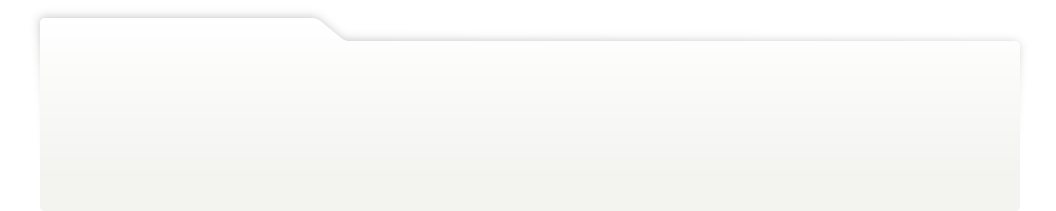
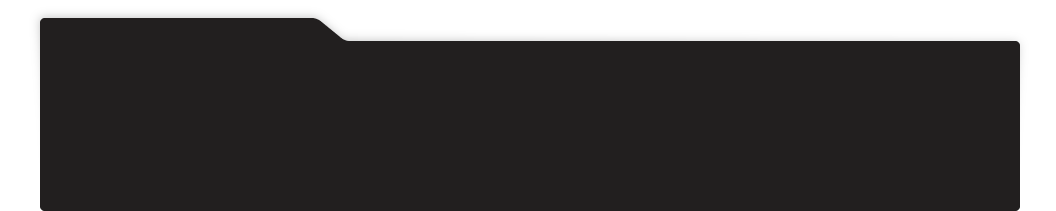
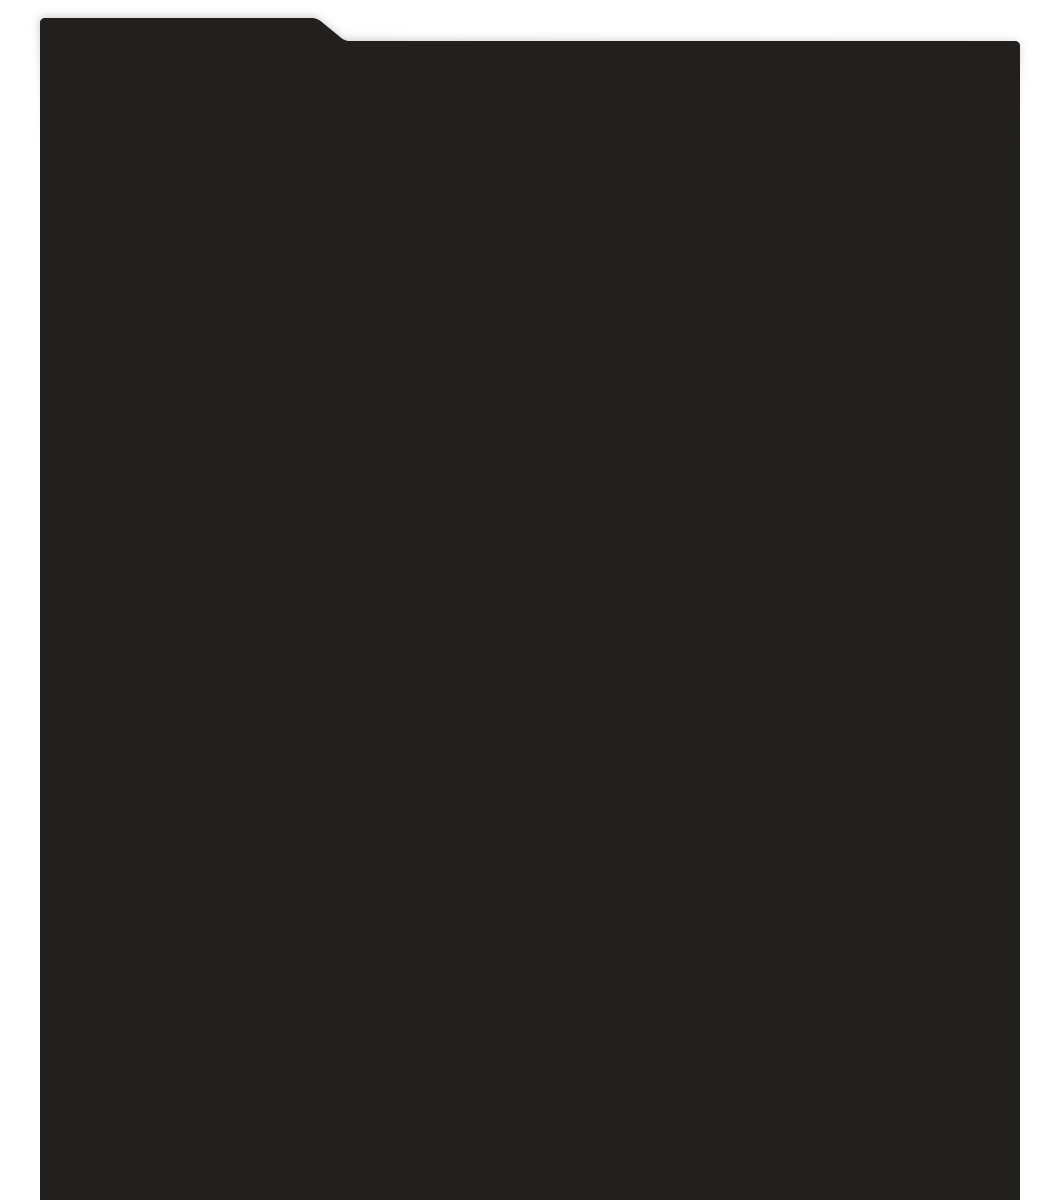
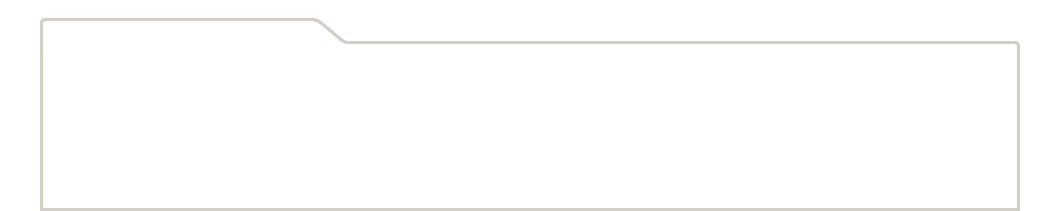
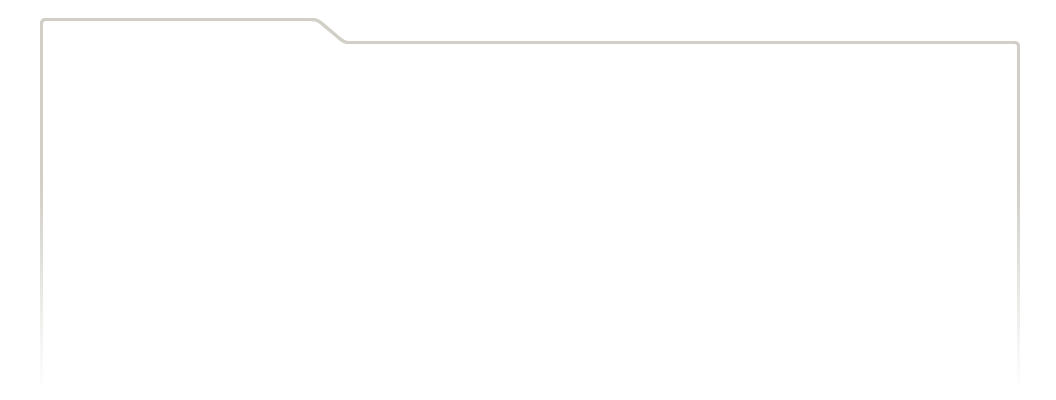
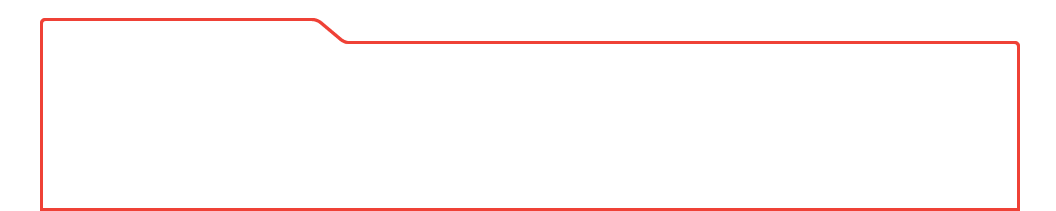
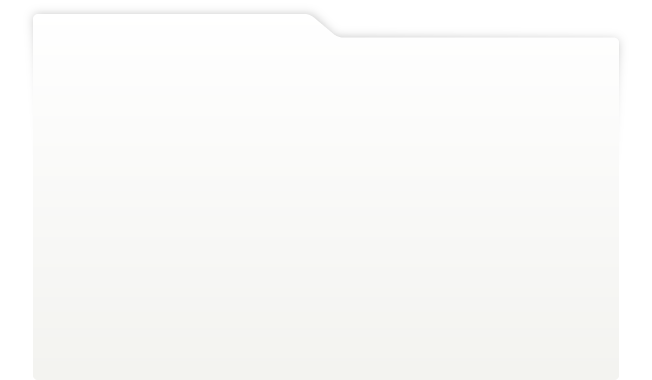
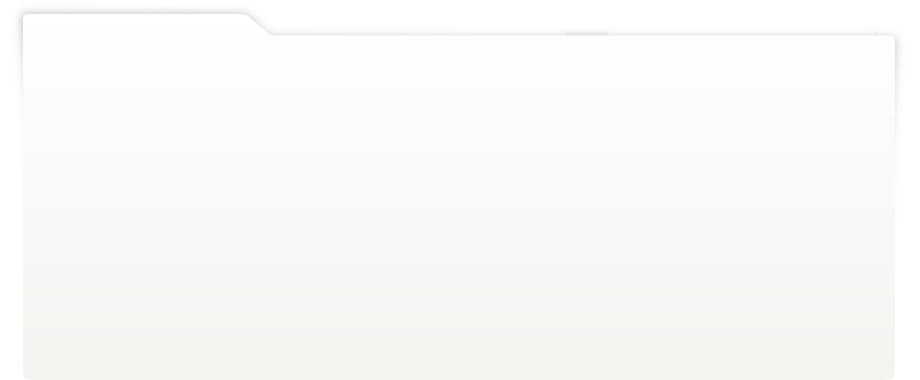
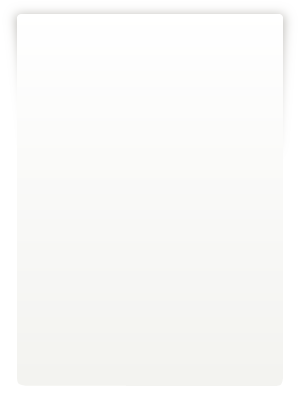
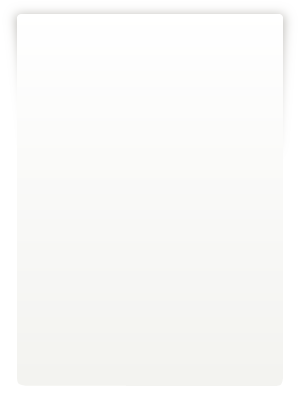
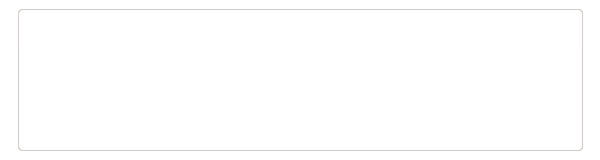
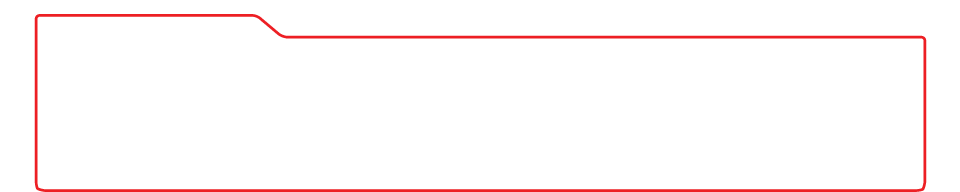
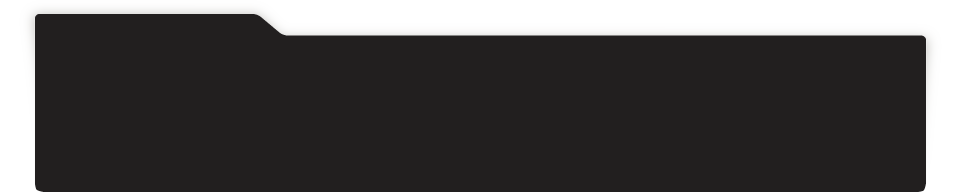
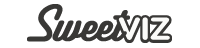
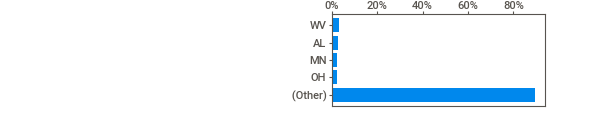
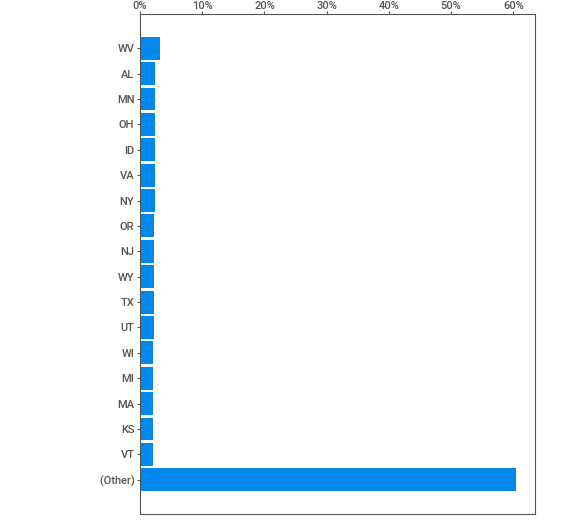
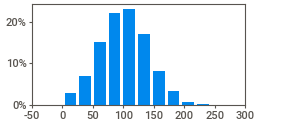
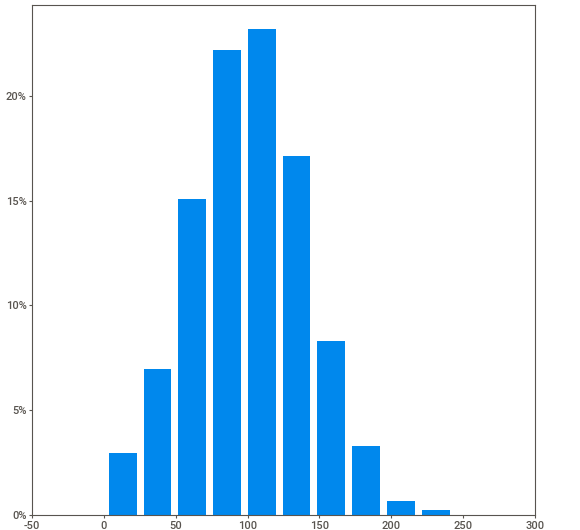
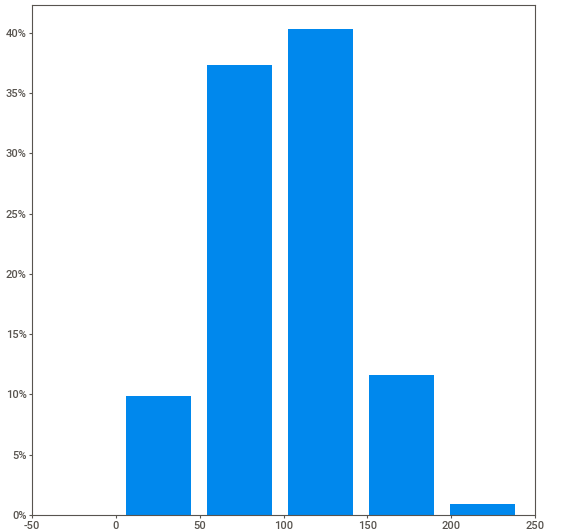
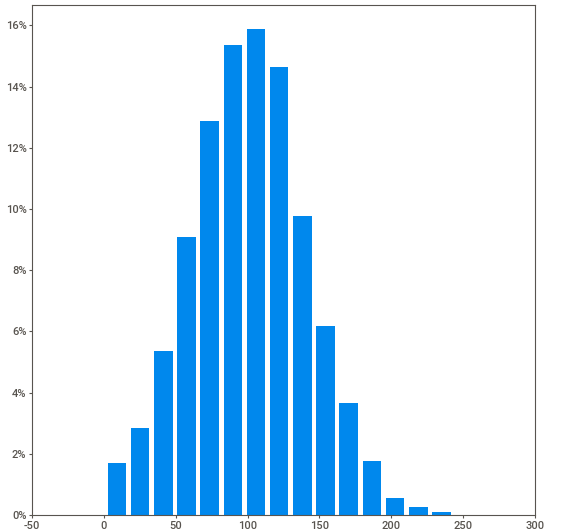
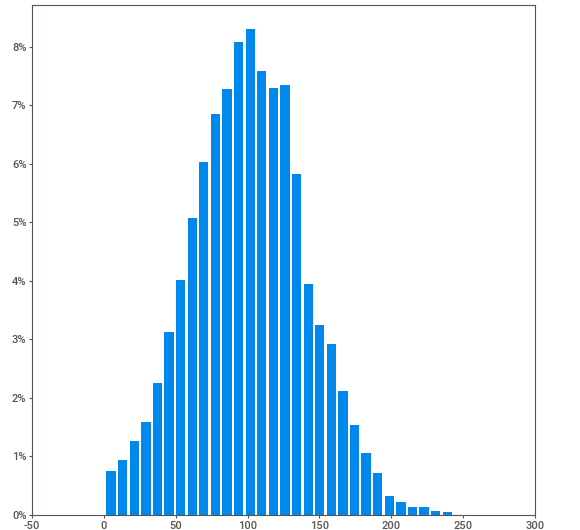
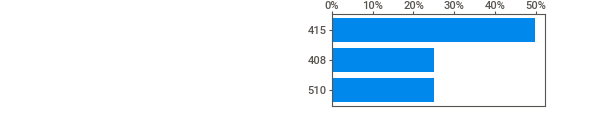
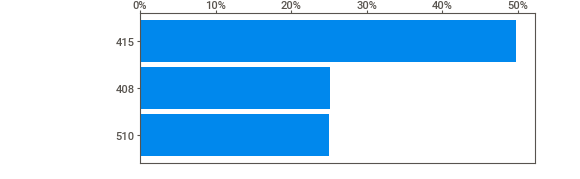
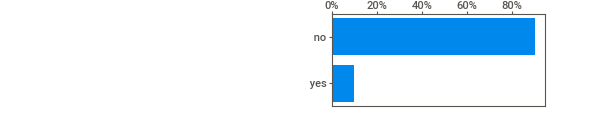
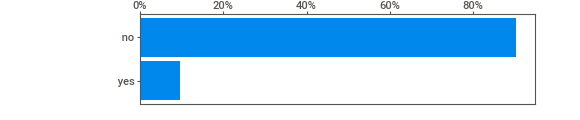
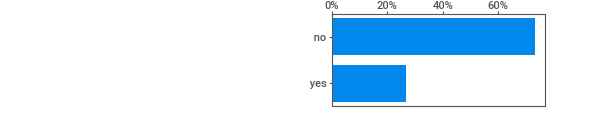
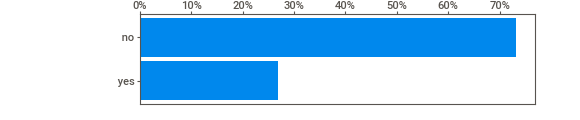
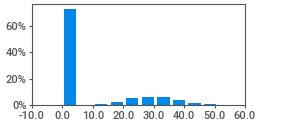
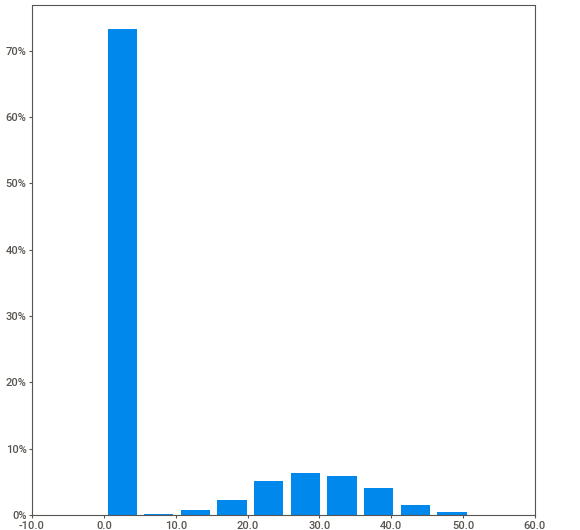
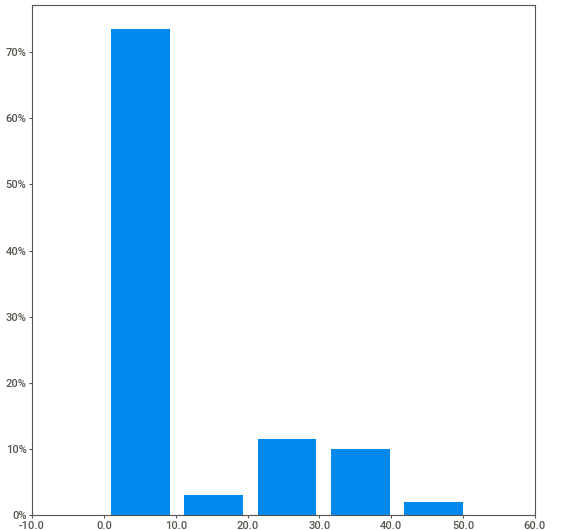
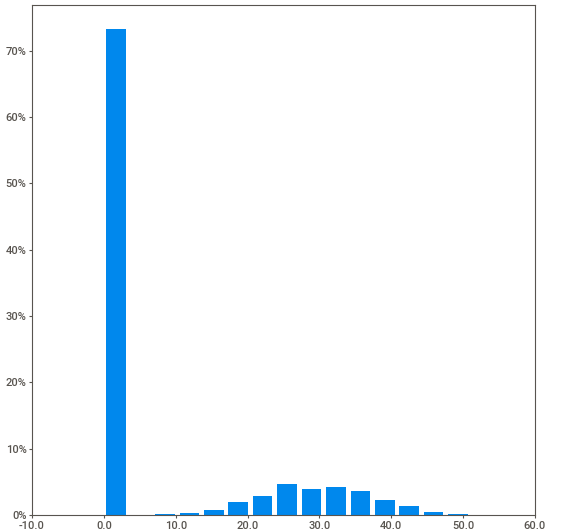
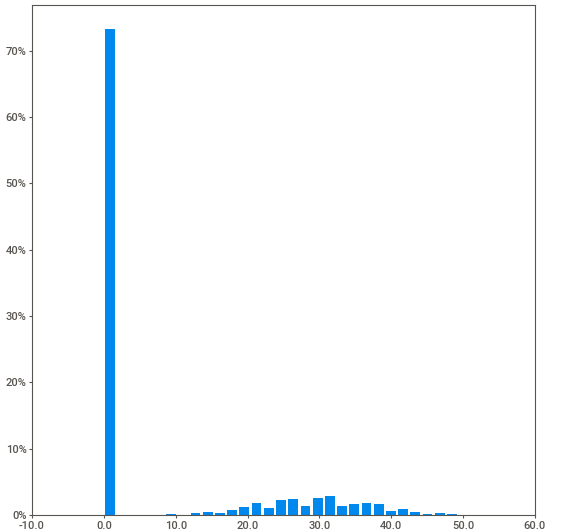
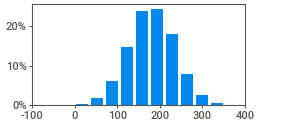
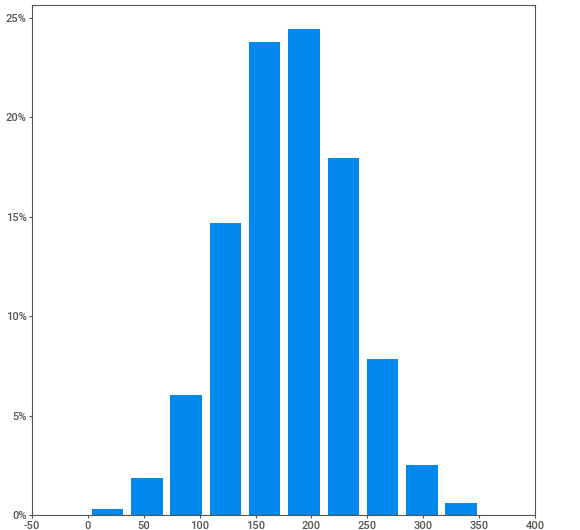
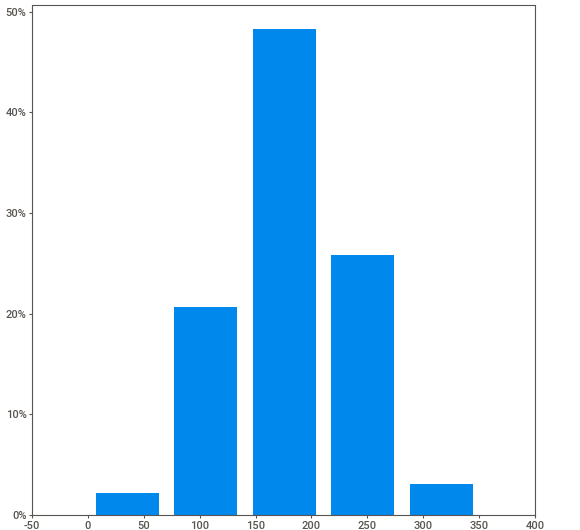
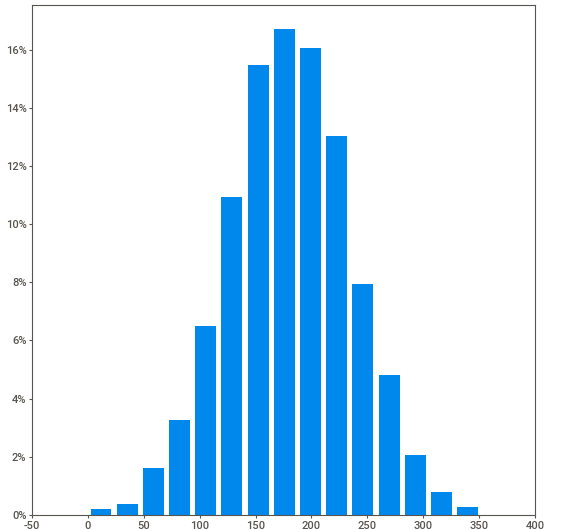
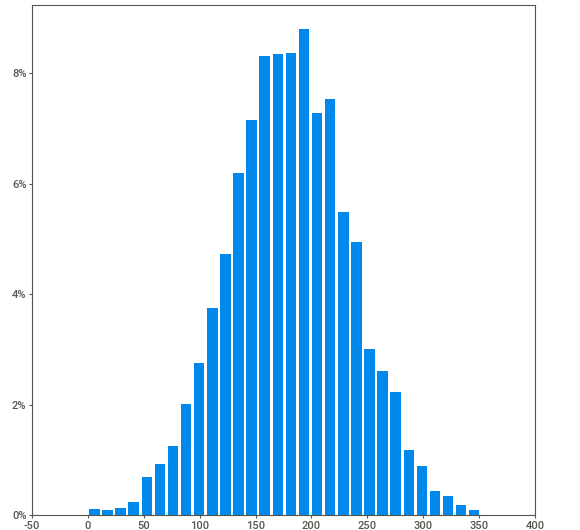
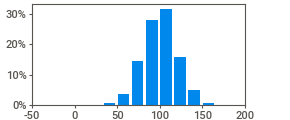
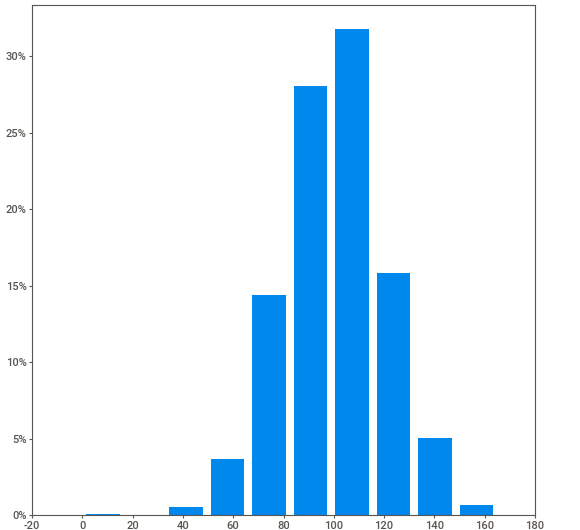
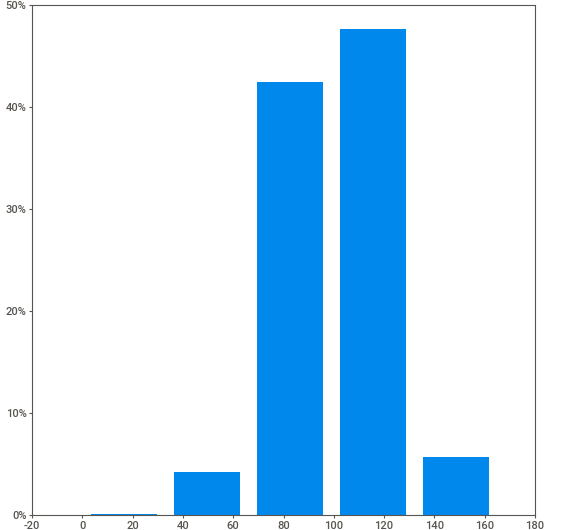
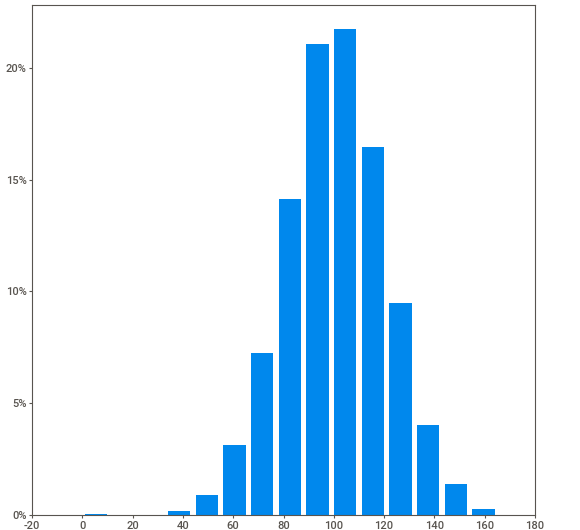
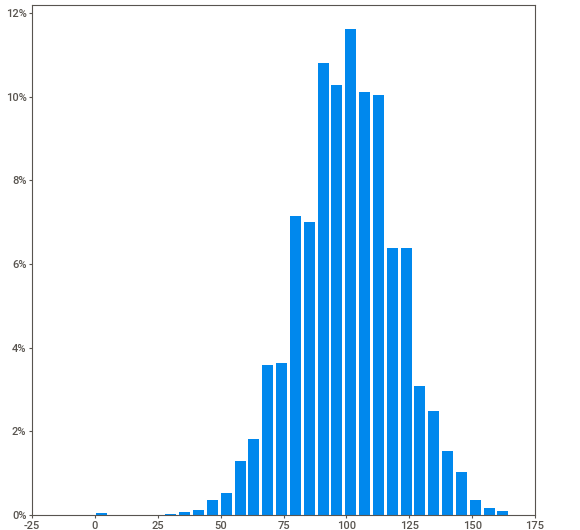
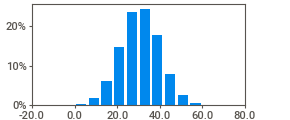
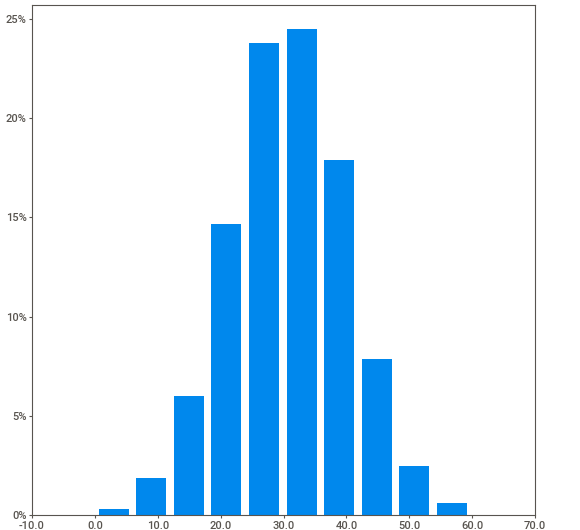
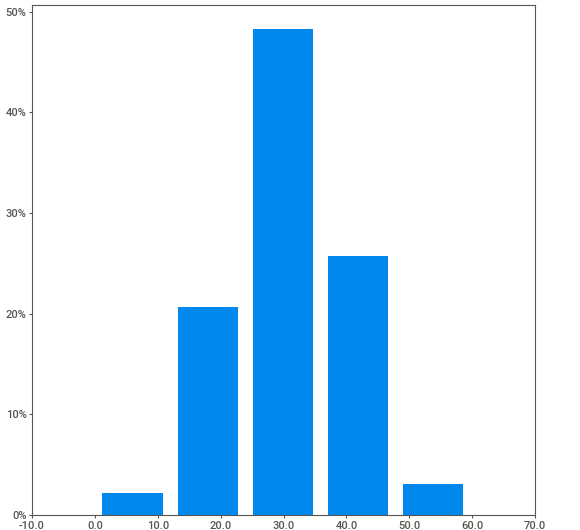
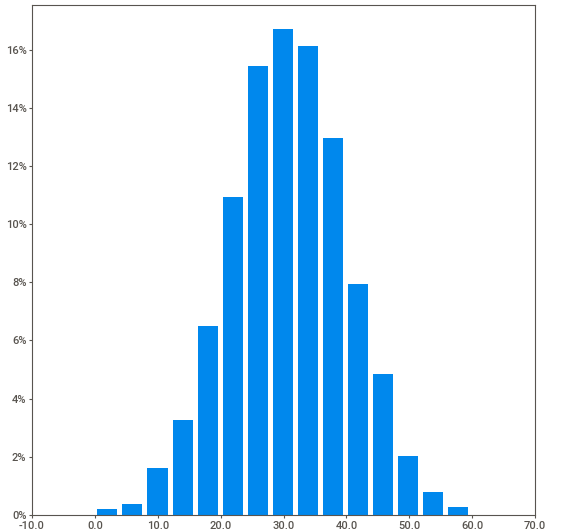
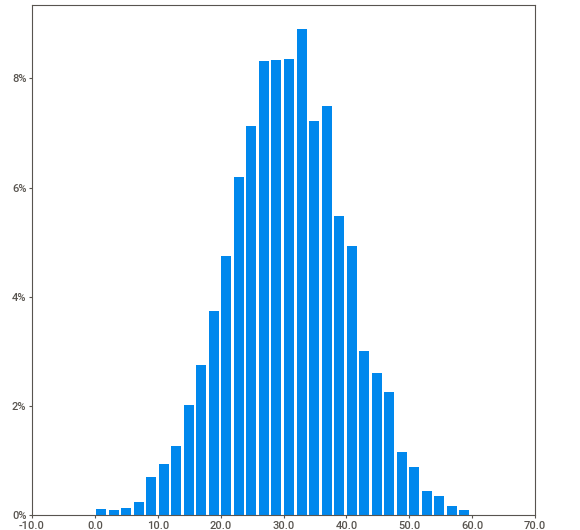
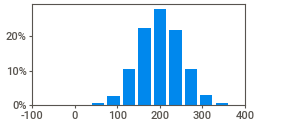
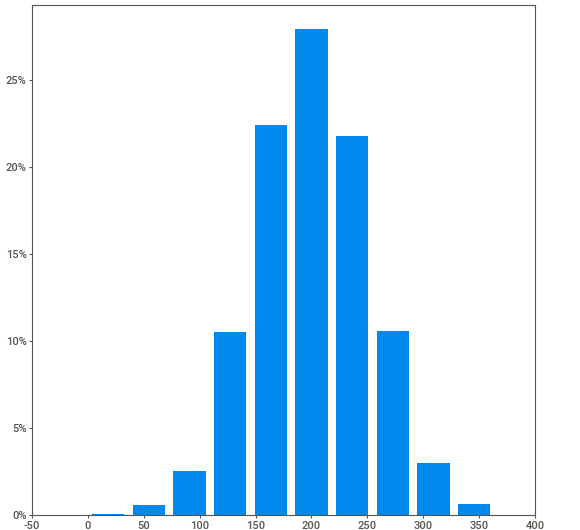
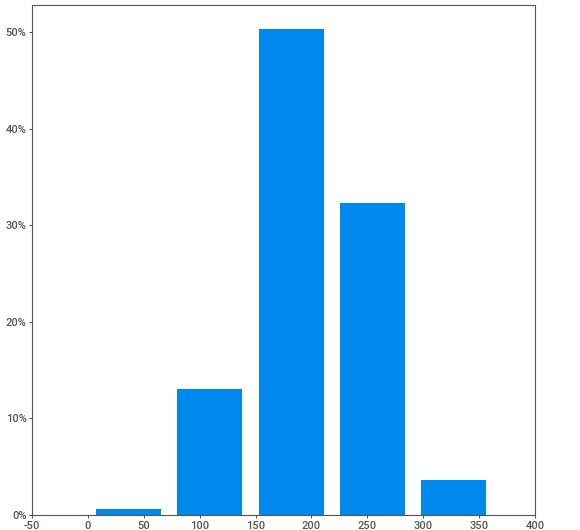
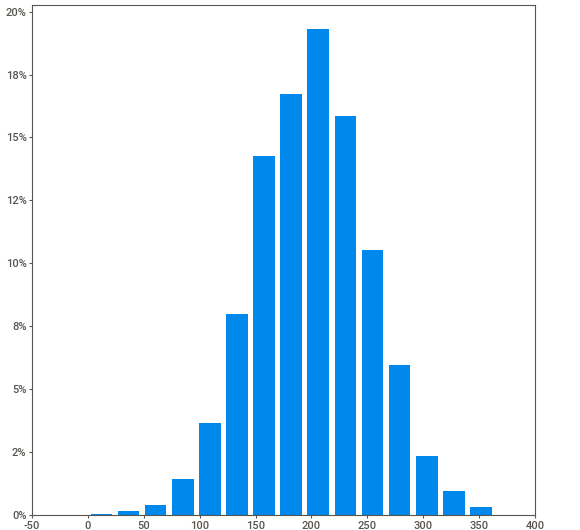
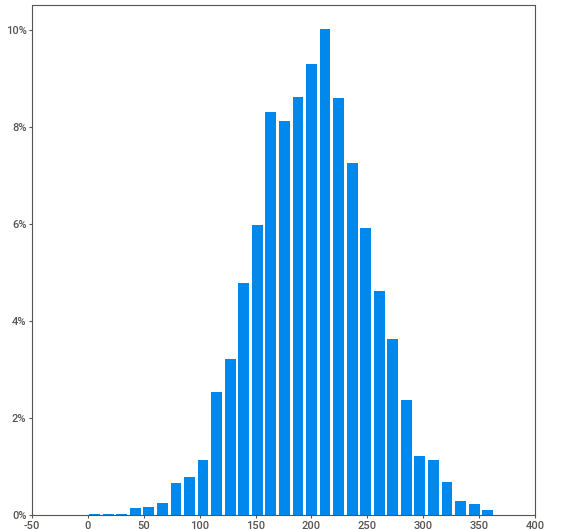
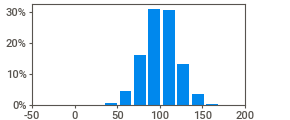
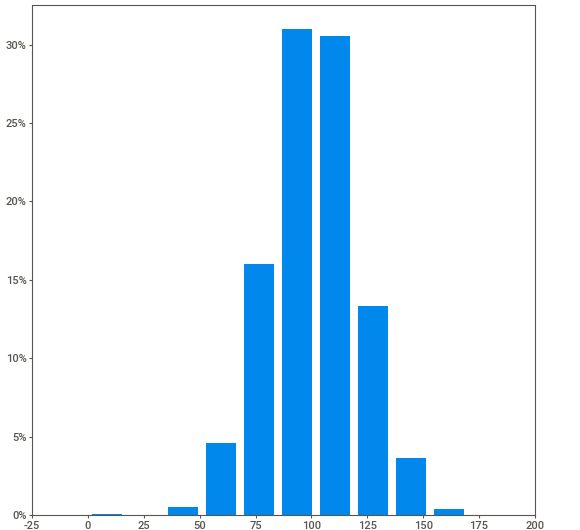
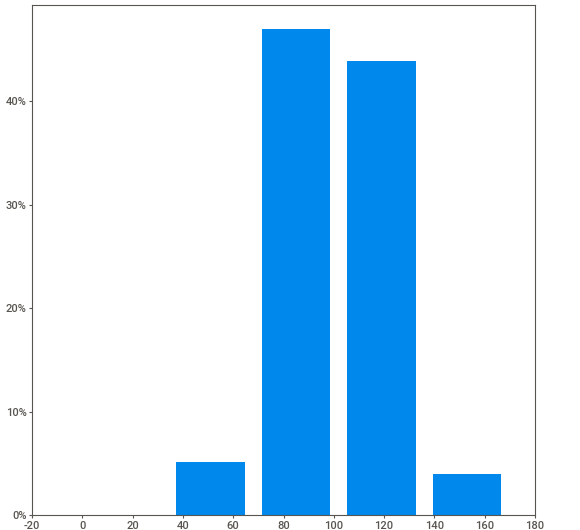
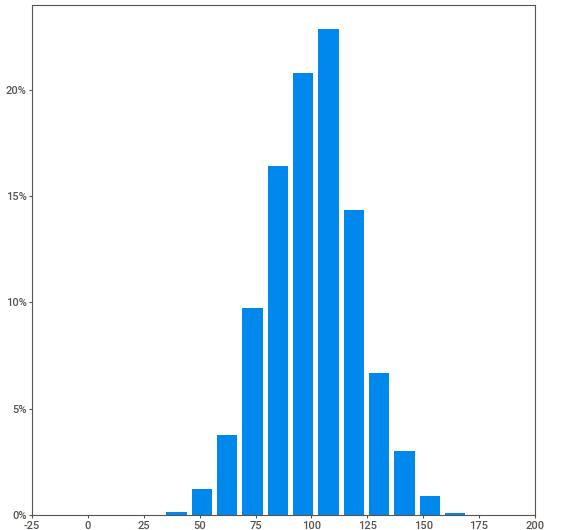
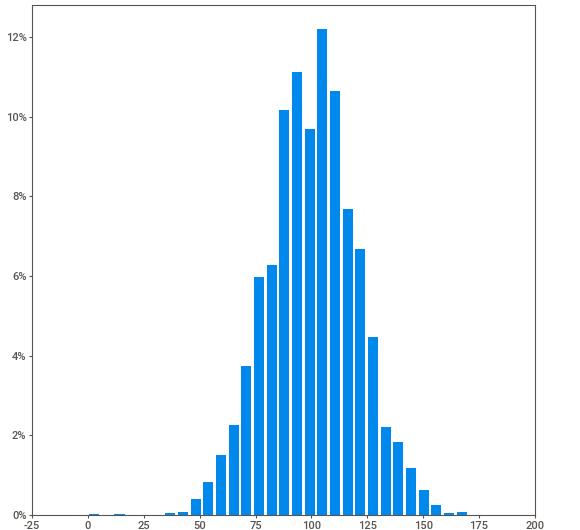
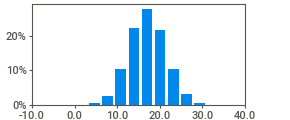
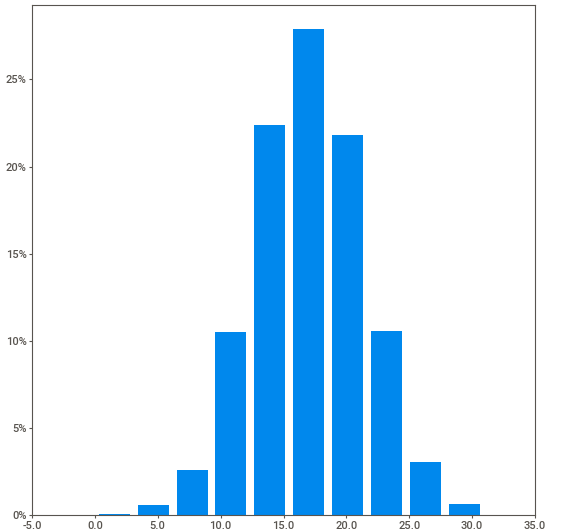
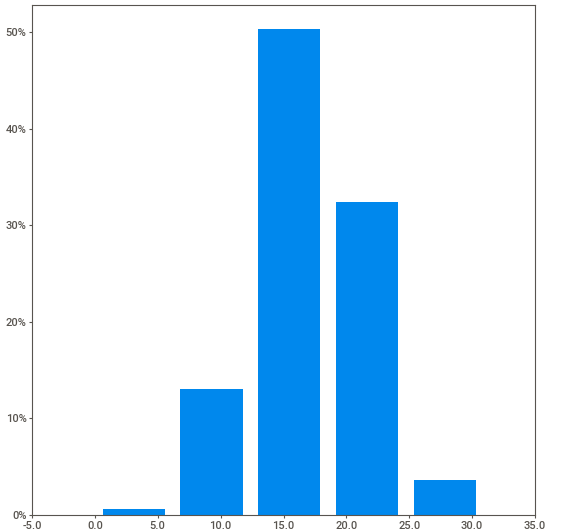
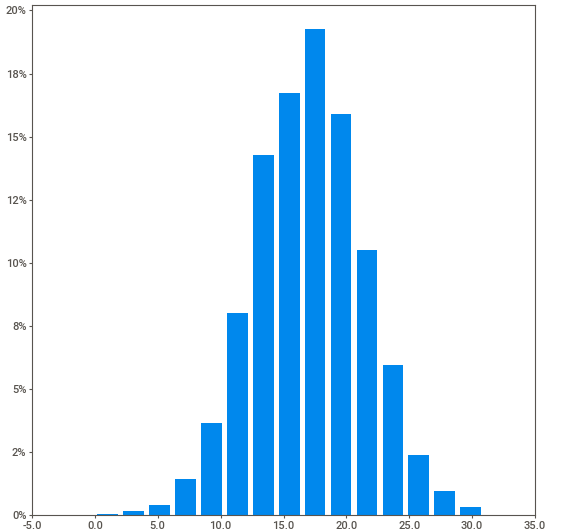
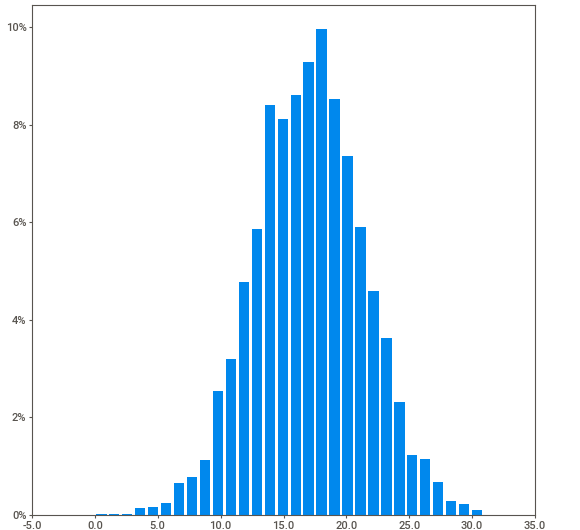
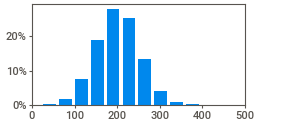
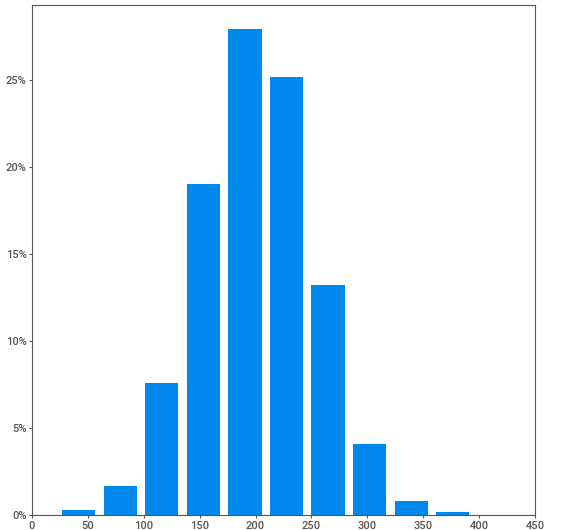
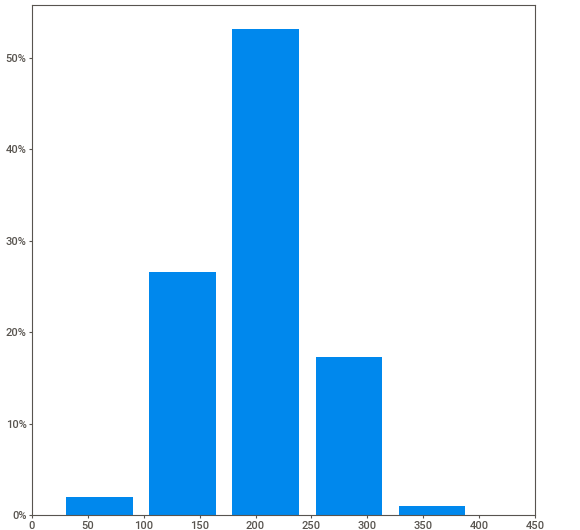
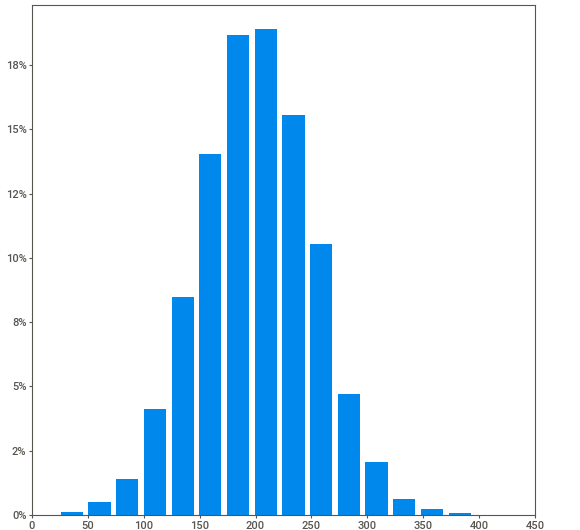
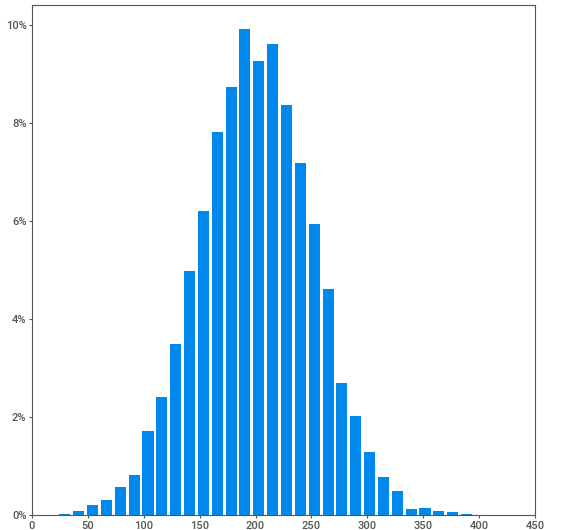
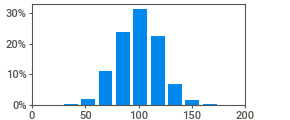
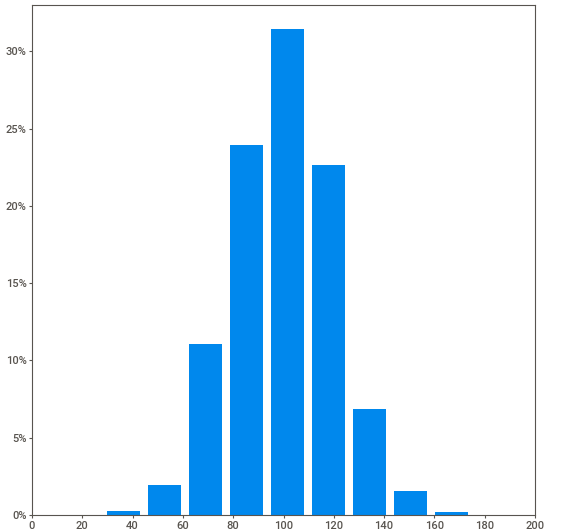
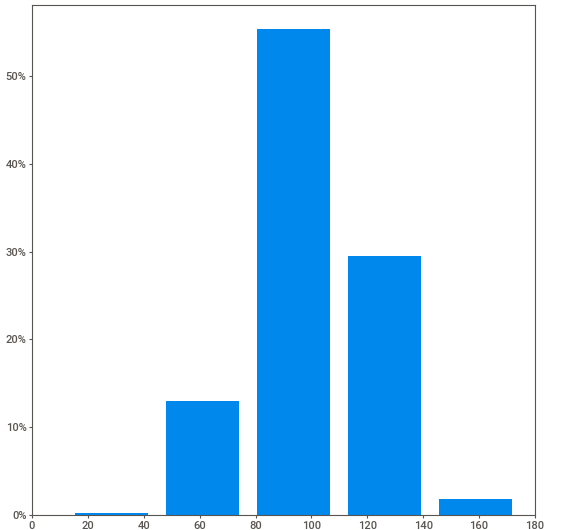
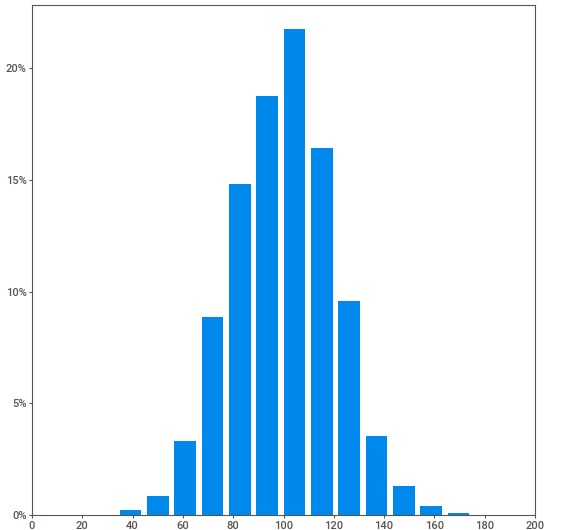
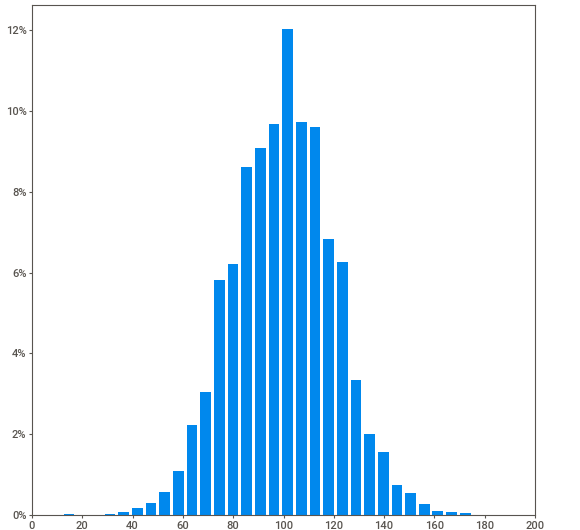
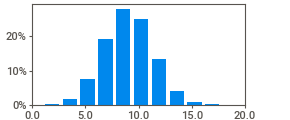
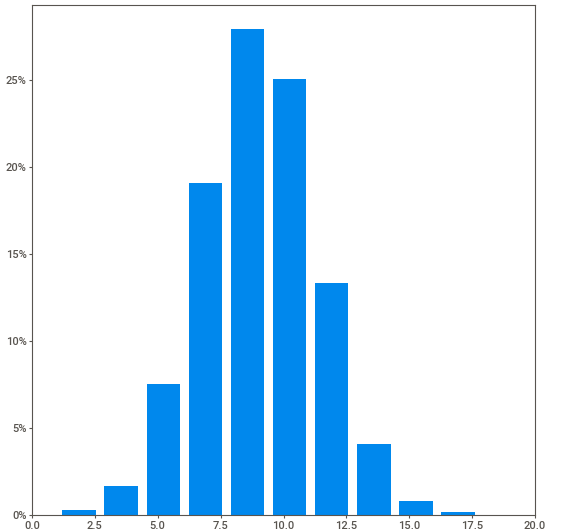
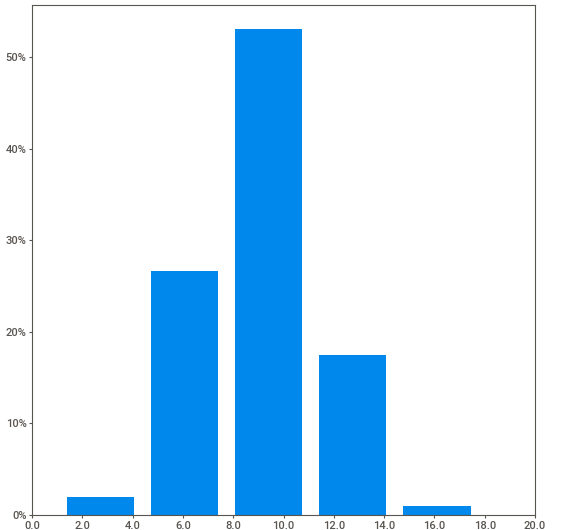
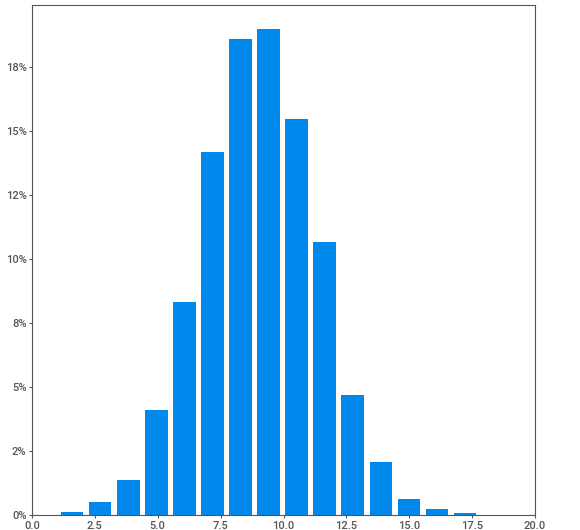
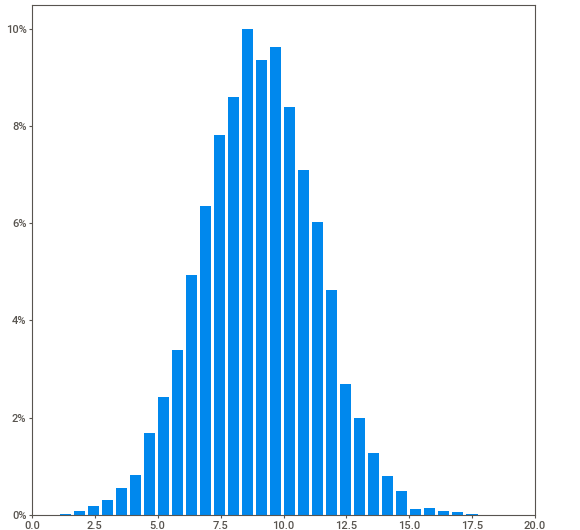
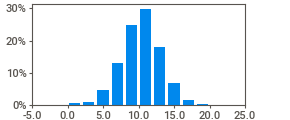
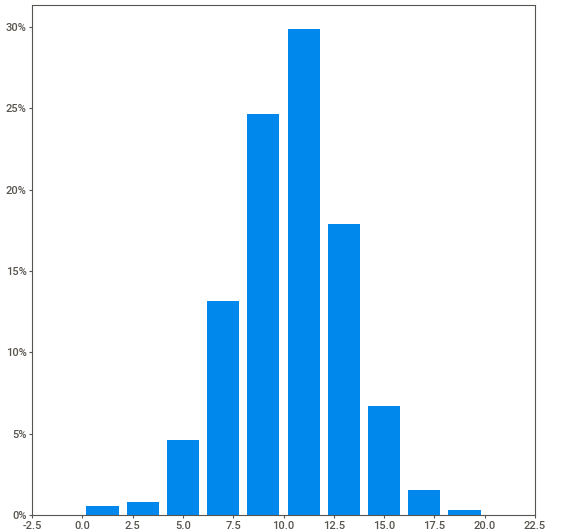
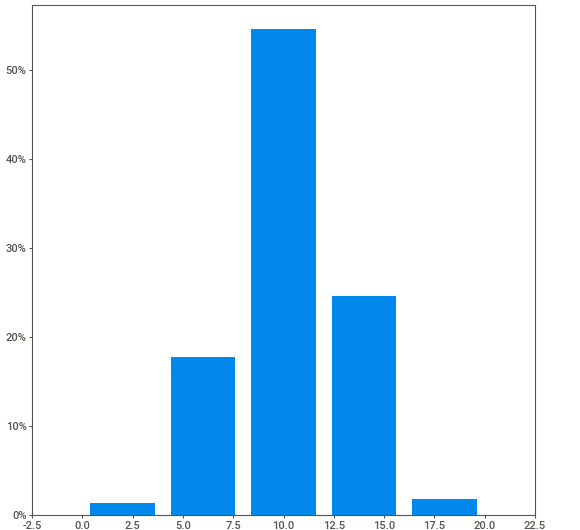
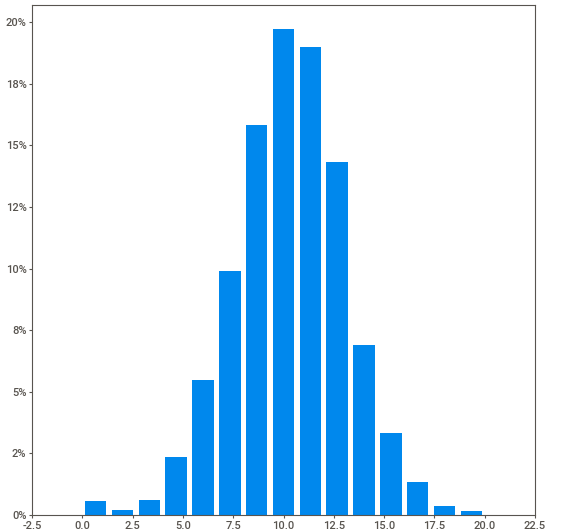
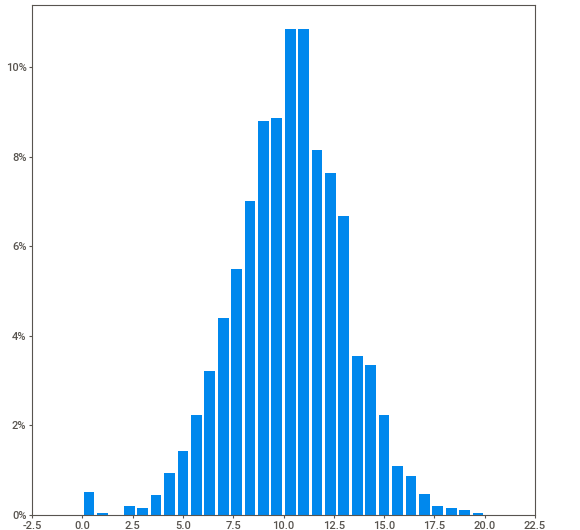
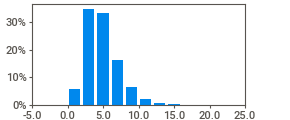
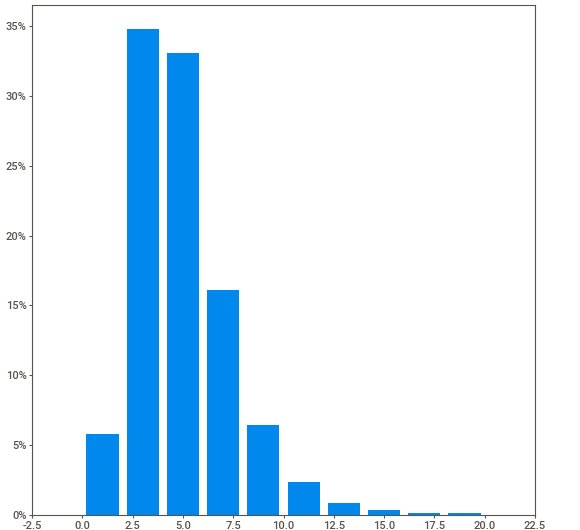
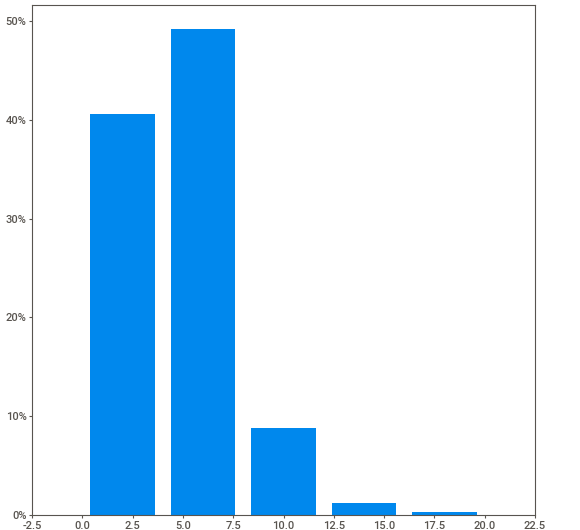
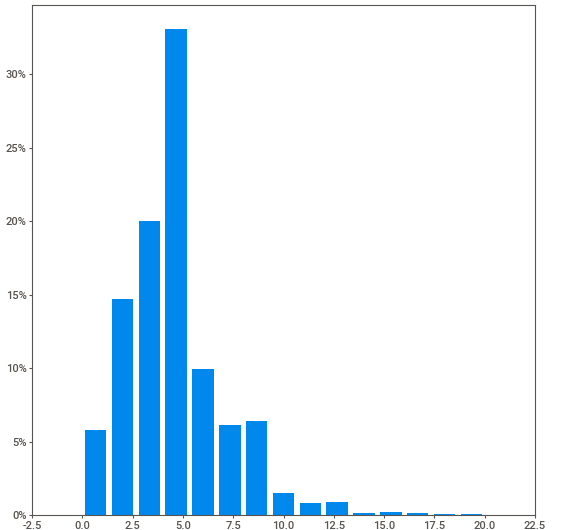
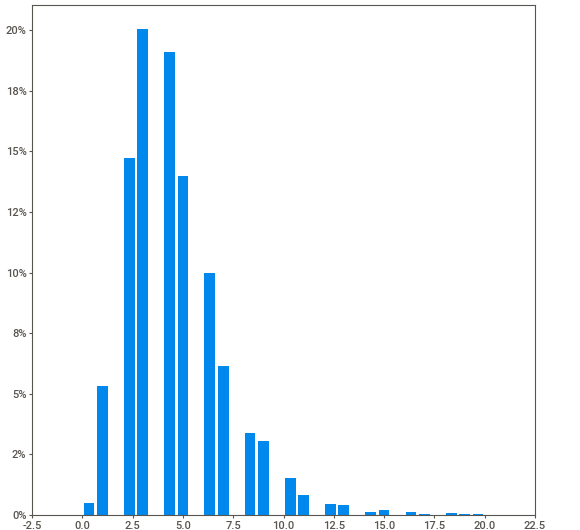
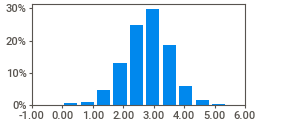
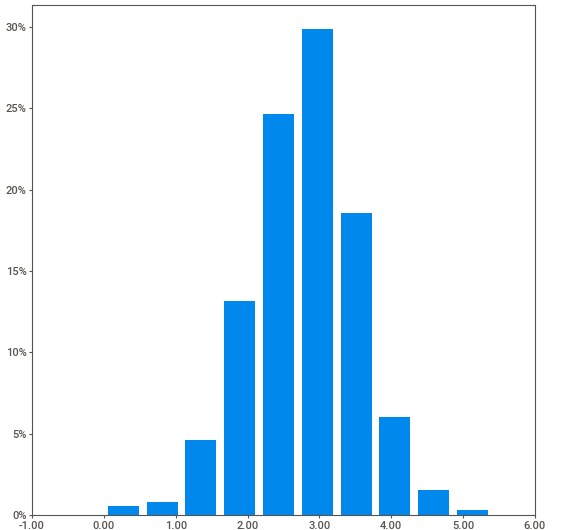
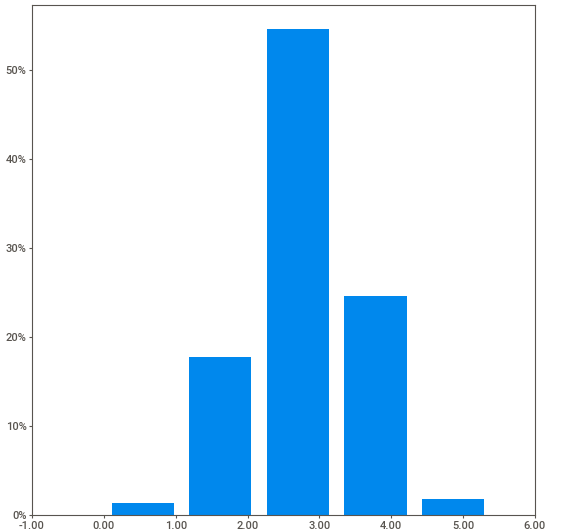
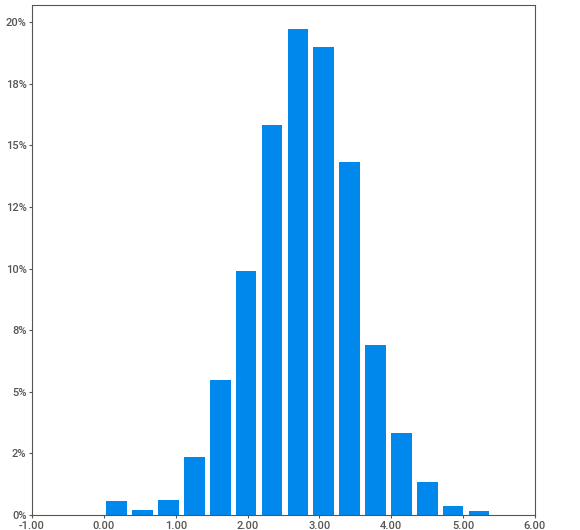
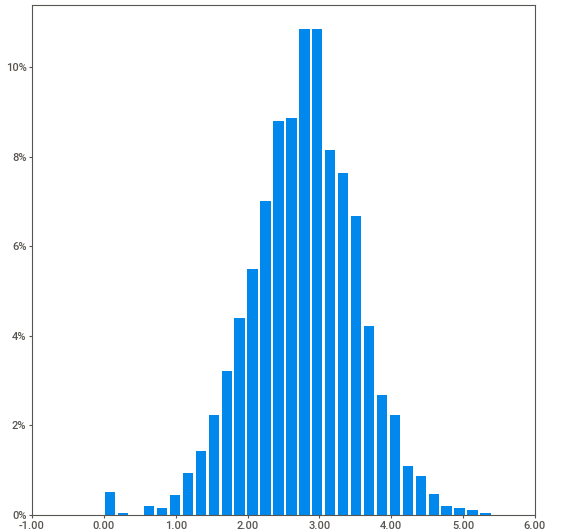
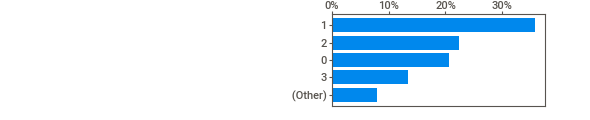
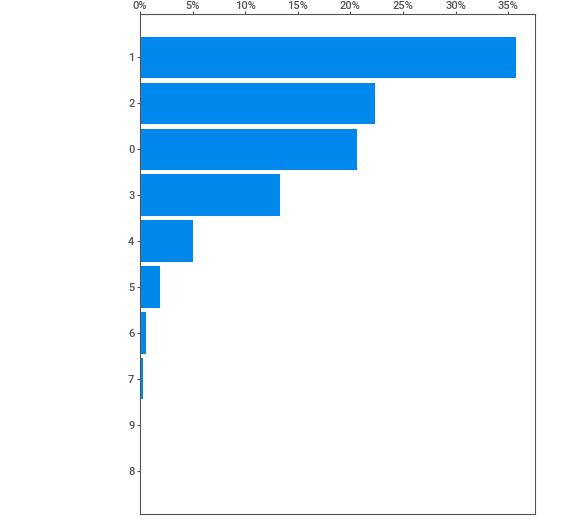
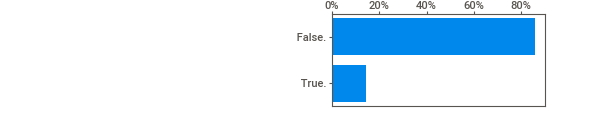
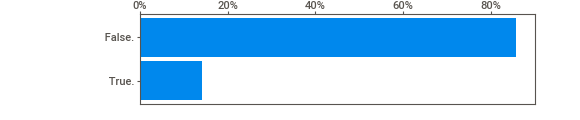
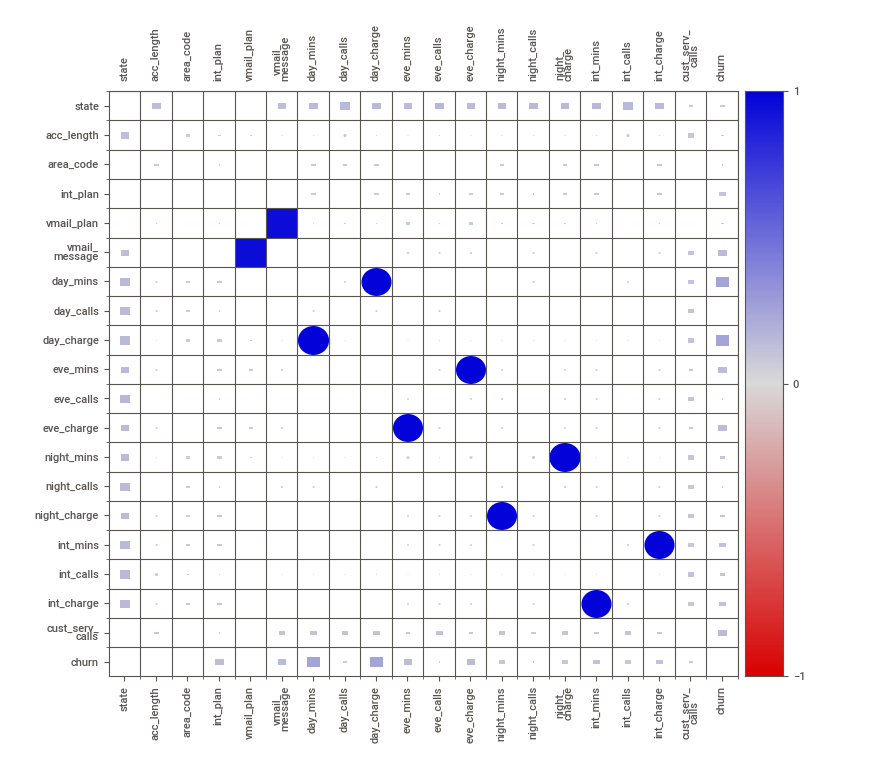
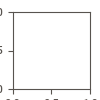

In [11]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_notebook()

#### Insights

1.States:
- There are 51 distinct states in the dataset, with "WV" having the highest occurrence, accounting for 149 instances, which represents approximately 3% of the entire dataset. 
- Additionally, there are several other states, such as "AL," "MN," and "OH," each making up around 2% of the dataset, indicating a relatively balanced distribution across these states.

2.account_lenght:
- The duration of account tenure varies from 1 to 243 units, 
- with the majority of values falling within the range of 90 to 110 units.

3.area_code:
- Area Code 415: Approximately 50% of the customers have this area code (2,299 out of the total).
- Area Code 408: Around 25% of the customers have this area code (1,161 out of the total).
- Area Code 510: Similarly, about 25% of the customers have this area code (1,157 out of the total).
- The area code "415" has the highest representation among the three area codes, making up 50% of the customer base. 
- This could potentially indicate a geographic concentration of customers in that particular area, 
- which might warrant further investigation or targeted marketing strategies

4.international_plan:
- Approximately 90% of customers (4,171 out of 4,617) do not have an international calling plan ("no").
- Around 10% of customers (446 out of 4,617) have opted for an international calling plan ("yes").
- This indicates that the majority of customers do not require or use international calling services provided by the telecom operator.

5.Voice mail plan:
- No Voice Mail Plan (No): This category accounts for approximately 73% (3,381 out of 4,617) of the total instances in the dataset.
- Yes Voice Mail Plan (Yes): This category represents around 27% (1,236 out of 4,617) of the total instances.

6.Day calls:
- The range of calls made by customers during the day is from 0 to 165. 
- The majority of customers, however, tend to make around 80 to 120 calls during the daytime. 
- This suggests that most customers have a moderate level of engagement in terms of making calls during the day.

7.Evening calls:
- Customers' evening call activity varies between 0 and 170 calls. 
- The peak of call activity falls within the range of 90 to 120 calls during the evening. 
- This indicates that a significant proportion of customers tend to engage in moderate call activity in the evening hours.

8.Night calls:
- Customer call activity during nighttime spans from 12 to 175 calls. 
- Notably, around 2.5% of customers have a relatively consistent call count of 105 during the night, indicating a stable nighttime communication pattern among this subset of customers.

9.Internationa calls:
- The range of international calls made by customers per day is from 0 to 20.
- About 40 % of customer make 3 to 4 international calls,
- very few customers make more than 15 international calls per day, indicating that international call activity is generally within a lower range for most customers.

10.customer service calls:
- The number of customer service calls made by the customer is an important variable to consider when predicting customer churn. - Analysis of the data reveals the following distribution of customer service call counts:
- Customers who made 0 to 2 calls account for approximately 36% of the dataset.
- Customers who made 3 to 4 calls account for about 13% of the dataset.
- Customers who made 5 calls account for around 2% of the dataset.
- Customers who made 6 or more calls each account for less than 1% of the dataset.

11.Churn:
- In the dataset 86% is false and remaining 14% is True, so we may need to do SMOTE for balancing the target variable.

### Bivarient/Multivarient Analysis

### ANALYSIS ON CATEGORICAL VERIABLE WITH RESPECT TO TARGET VERIABLE(CHURN)- using countplot

In [715]:
catg_cols

['state', 'int_plan', 'vmail_plan', 'churn', 'cust_serv_calls', 'area_code']

In [716]:
c=['int_plan', 'vmail_plan','area_code','cust_serv_calls']

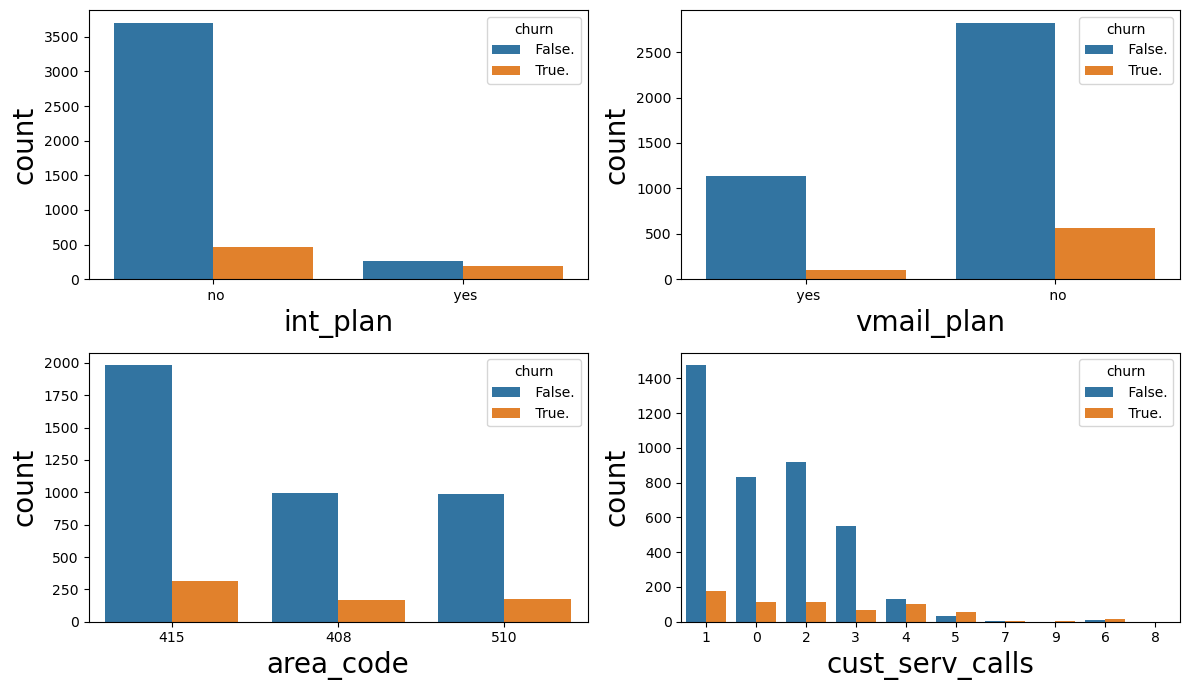

In [717]:
plt.figure(figsize=(12,7))
n = 1  
for i in c:
    if n<5 :     # set the limit
        plt.subplot(2,2,n) 
        sns.countplot(x=df[i],hue=df.churn)
        plt.xlabel(i,fontsize=20) 
        plt.ylabel('count',fontsize=20) 
    n+=1 # increment of plotnumber 
plt.tight_layout()
plt.show() 

#### Observations:


#### 1. Impact of int_plan on churn:
- The presence of an "International Plan" seems to have a notable impact on customer churn. 
- Those who have chosen the international plan appear to be at a higher risk of migrating to other competitors in comparison to customers who did not opt for international plans. 
- Approximately 50% of customers with an international plan exhibit a risk of switching providers. 
- This heightened risk might be attributed to the potentially elevated costs associated with international plans. 
- On the contrary, the proportion of customers leaving who do not have international plans is substantially lower, indicating that this group has a much lower churn rate.


#### 2. Impact of voice mail plan on churn:
- The presence or absence of a "Voicemail Plan" seems to influence customer churn as well. 
- Customers who have declined the voicemail plan are showing a susceptibility to migrate to other competitors. 
- Around 20% of customers who do not have a voicemail plan are exhibiting a tendency to switch networks. 
- This suggests that customers without a voicemail plan have a relatively higher likelihood of leaving the current telecom provider.

#### 3.Impact of area code on churn:
- The "Area Code" variable does not seem to have a significant impact on customer churn. 
- The churn rate appears to be relatively consistent across the three different area codes,
- suggesting that the area code itself might not be a major contributing factor to customers leaving the network.

#### 4.Impact of customer service call on churn:
- The graph clearly illustrates the impact of the number of customer service calls on churn. 
- It is evident that when the count of customer service calls exceeds 4, the risk of losing the customer increases significantly. 
- This observation implies that a high number of customer service interactions may correlate with customer dissatisfaction or unresolved issues, potentially leading to a higher likelihood of churn. 
- Therefore, this graph highlights the importance of addressing customer concerns effectively to mitigate the risk of losing them.

### ANALYSIS ON NUMERICAL VERIABLE WITH RESPECT TO TARGET VERIBLE (CHURN)- using hisplot

In [718]:
nume_cols

['acc_length',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'int_mins',
 'int_calls',
 'int_charge']

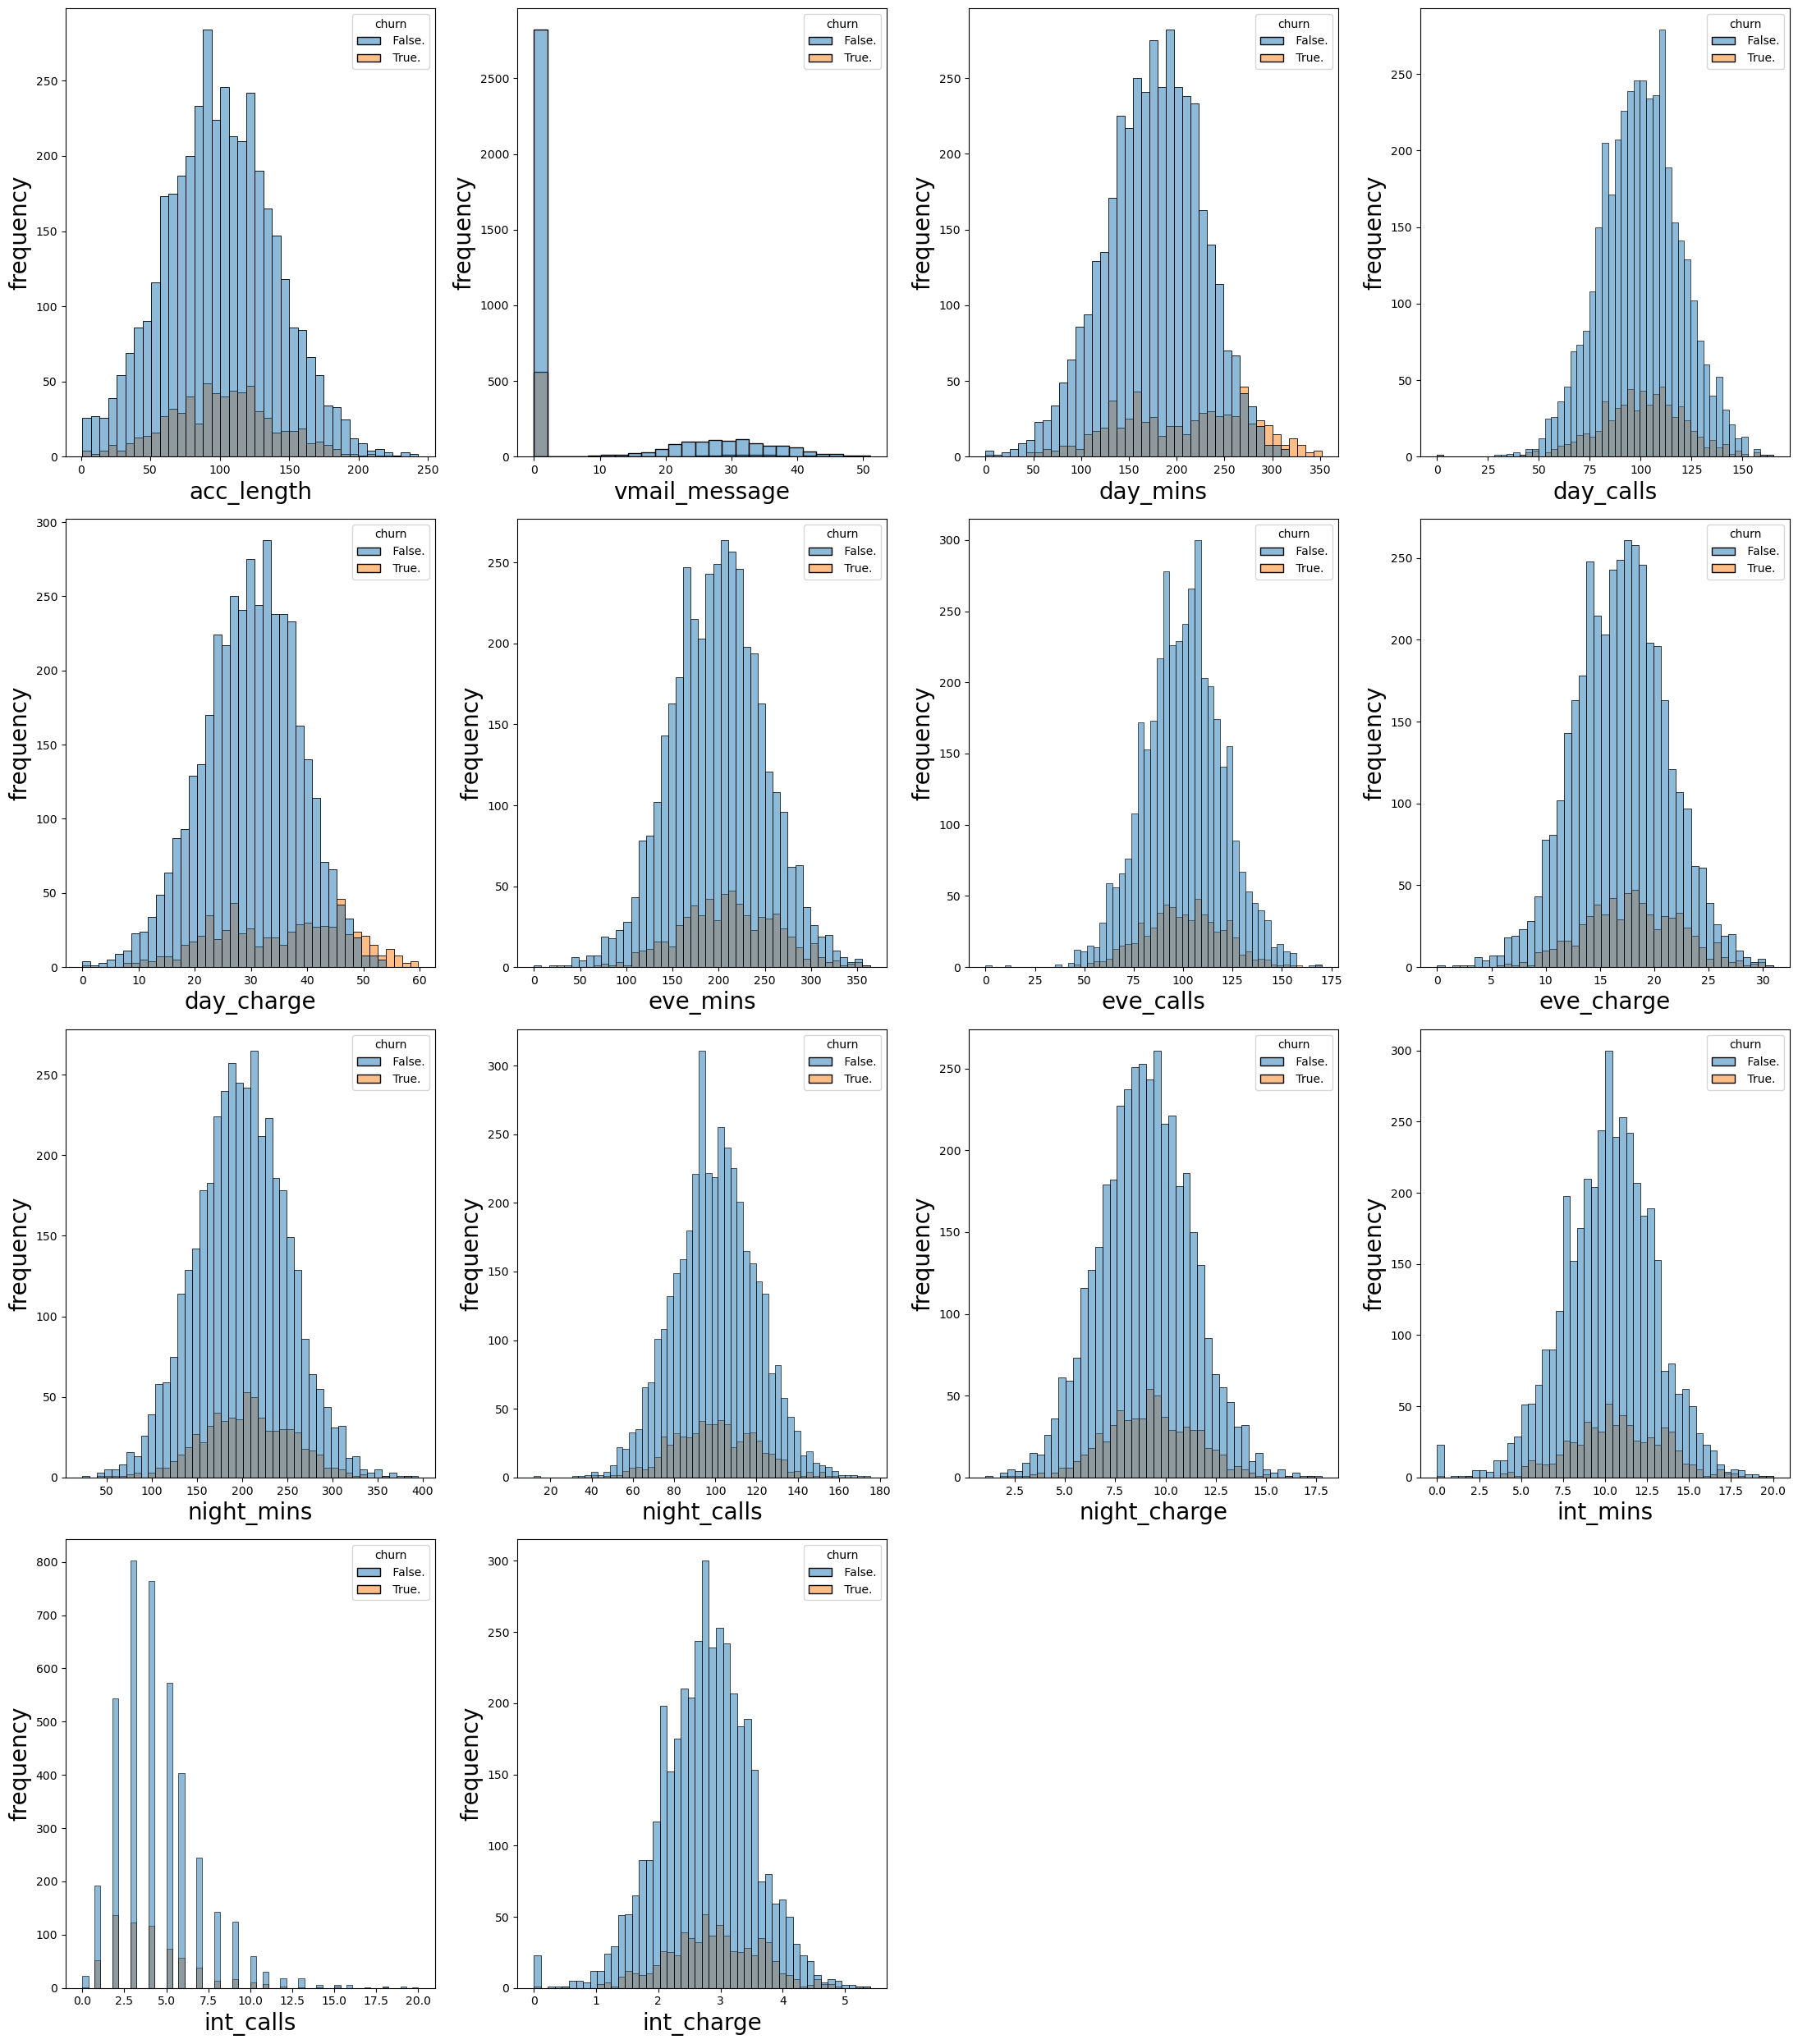

In [719]:
plt.figure(figsize=(22,25))
n = 1  
for i in nume_cols:
    if n<17 :     # set the limit
        plt.subplot(4,4,n) 
        sns.histplot(x=df[i],hue=df.churn)
        plt.xlabel(i,fontsize=20) 
        plt.ylabel('frequency',fontsize=20) 
    n+=1 # increment of plotnumber 
plt.tight_layout()
plt.show() 

#### Observation


#### 1.Impact of account lenght on churn:
- It's indeed surprising to observe that the "Account Length" variable does not appear to have a significant impact on churn.
- Normally, longer account lengths are associated with customer loyalty and the expectation that customers who have been with the company for a while are less likely to switch to competitors.
- However, this dataset indicates that the relationship between account length and churn is not as straightforward as expected, and other factors might be playing a more dominant role in influencing customer decisions to switch providers. 
- This underscores the importance of considering multiple variables and conducting thorough analysis to understand the dynamics of churn within the telecom industry.


#### 2.Impact of number of voicemail messages on churn:
- The analysis suggests that customers who send a minimal or near-zero number of voicemail messages per day are more likely to switch to another service provider. 
- In other words, a lower volume of voicemail messages seems to be associated with a higher likelihood of customer churn.


#### 3.Impact of day_mins and day_charge on churn:
- The "Day Mins" (total number of minutes the customer has used during the day) and "Day Charge" (charges for daytime usage) variables exhibit a similar impact on customer churn.
- As both of these variables increase, the churn rate also increases.
- This suggests that customers who use more minutes during the day and consequently incure higher charges are more likely to churn. 
- The parallel influence of these two variables on churn suggests a direct relationship between usage patterns and the likelihood of customers migrating to other service providers.


#### 4.Impact of international calls on churn:
- An increase in the number of international calls per day is associated with a higher churn rate among customers. 
- In other words, customers who make more international calls are more likely to churn and migrate to other service providers.

The numerical variables such as 'Day Calls', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', and 'International Charge' do not appear to have a significant impact on churn. This is indicated by the observation that the churn ratio remains consistent across different values within these variables. As a result, these variables may not provide strong discriminatory power in predicting churn 

### Data Preprocessing

In [720]:
df.head()

,state,acc_length,area_code,int_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,int_mins,int_calls,int_charge,cust_serv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            4617 non-null   object 
 1   acc_length       4617 non-null   int32  
 2   area_code        4617 non-null   object 
 3   int_plan         4617 non-null   object 
 4   vmail_plan       4617 non-null   object 
 5   vmail_message    4617 non-null   int32  
 6   day_mins         4617 non-null   float64
 7   day_calls        4617 non-null   int32  
 8   day_charge       4617 non-null   float64
 9   eve_mins         4617 non-null   float64
 10  eve_calls        4617 non-null   int32  
 11  eve_charge       4617 non-null   float64
 12  night_mins       4617 non-null   float64
 13  night_calls      4617 non-null   int32  
 14  night_charge     4617 non-null   float64
 15  int_mins         4617 non-null   float64
 16  int_calls        4617 non-null   int32  
 17  int_charge    

### Categorical Encoding
- There are different techniques to convert categorical data to numeric such as: label encoding, dummy encoding, one hot encoding, frequency encoding, target guided ordinal encoding, mean encoding, etc.
- We have used label encoding for categorical variable because it is not an ordinal column except cust_ser_calls column , means there no is a hierarchy between the values in the column.
- in cust_ser_calls column also we can use label encoding because it doesn't really affect the hierarchy. 

In [722]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [723]:
catg_cols

['state', 'int_plan', 'vmail_plan', 'churn', 'cust_serv_calls', 'area_code']

In [724]:
for i in catg_cols:
    df[i]=l.fit_transform(df[i])

In [725]:
df.head()

,state,acc_length,area_code,int_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,int_mins,int_calls,int_charge,cust_serv_calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Removing correlated columns
- When we remove columns that are strongly related to each other, the dataset becomes smaller. This helps algorithms for sorting things into categories work faster and use less computer power.
- It makes the model simpler and easier to understand, but it still works well at deciding categories overall.
- Columns that are very similar give us the same information twice, which we don't need.

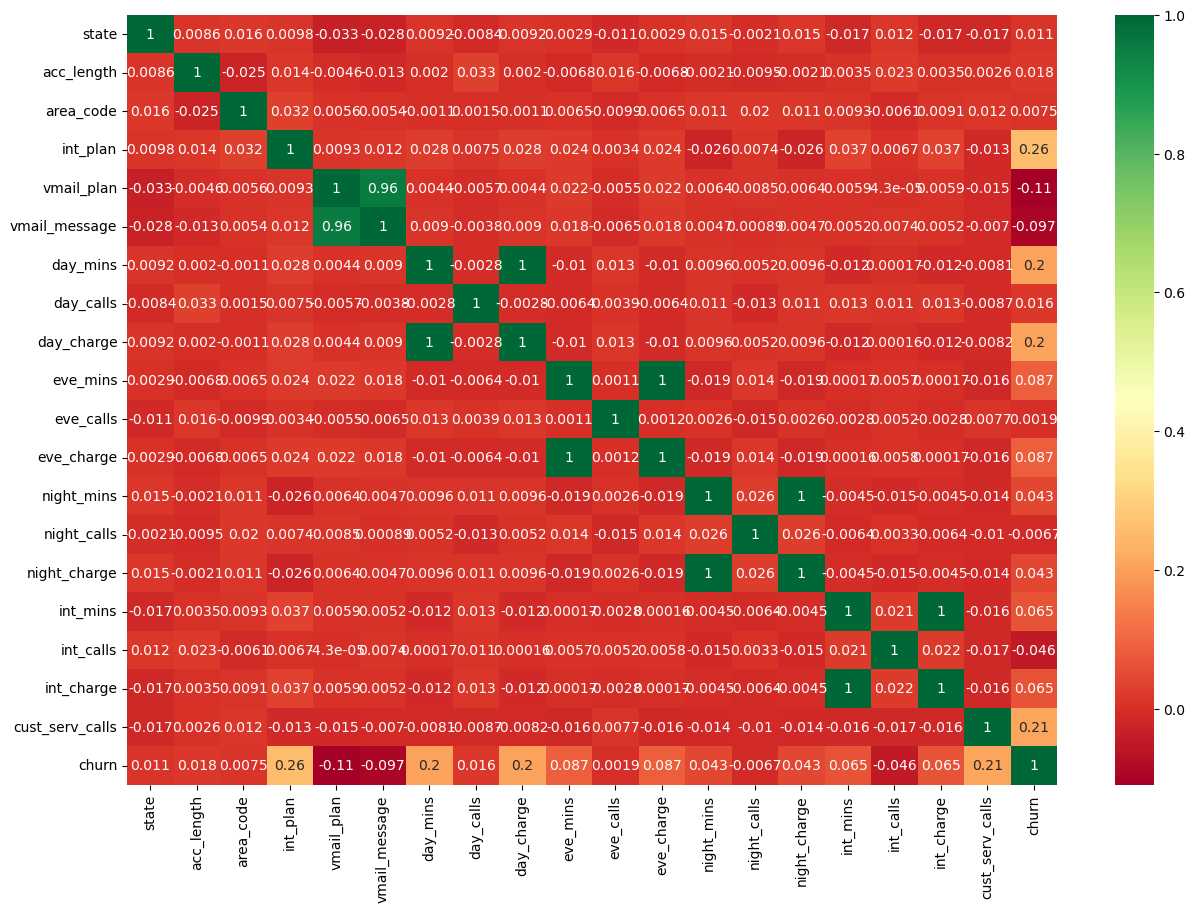

In [726]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})
plt.show()

- Here we are dropping columns with more than 95% correlation 
- Here we can see that some of the variables are strongly correlated to eachother so we can drop such columns.
- day_charge and day_mins 100% correlation
- eve_charge and eve_mins 100% correlation
- night_charge and night_mins 100% correlation
- int_charge and int_mins 100% correlation
- vmail_message  and vmail_plan 96% correlation
- from the above we can drop anyone which is least correalted with the target variable.

In [727]:
df.drop(columns=['vmail_message','day_mins','eve_mins','night_mins','int_mins'],inplace=True)

### OUTLIER HANDLING
- Outliers are data points that significantly deviate from the rest of the dataset.
- By identifying and addressing outliers, we ensure that the model's performance remains robust and unaffected by extreme values

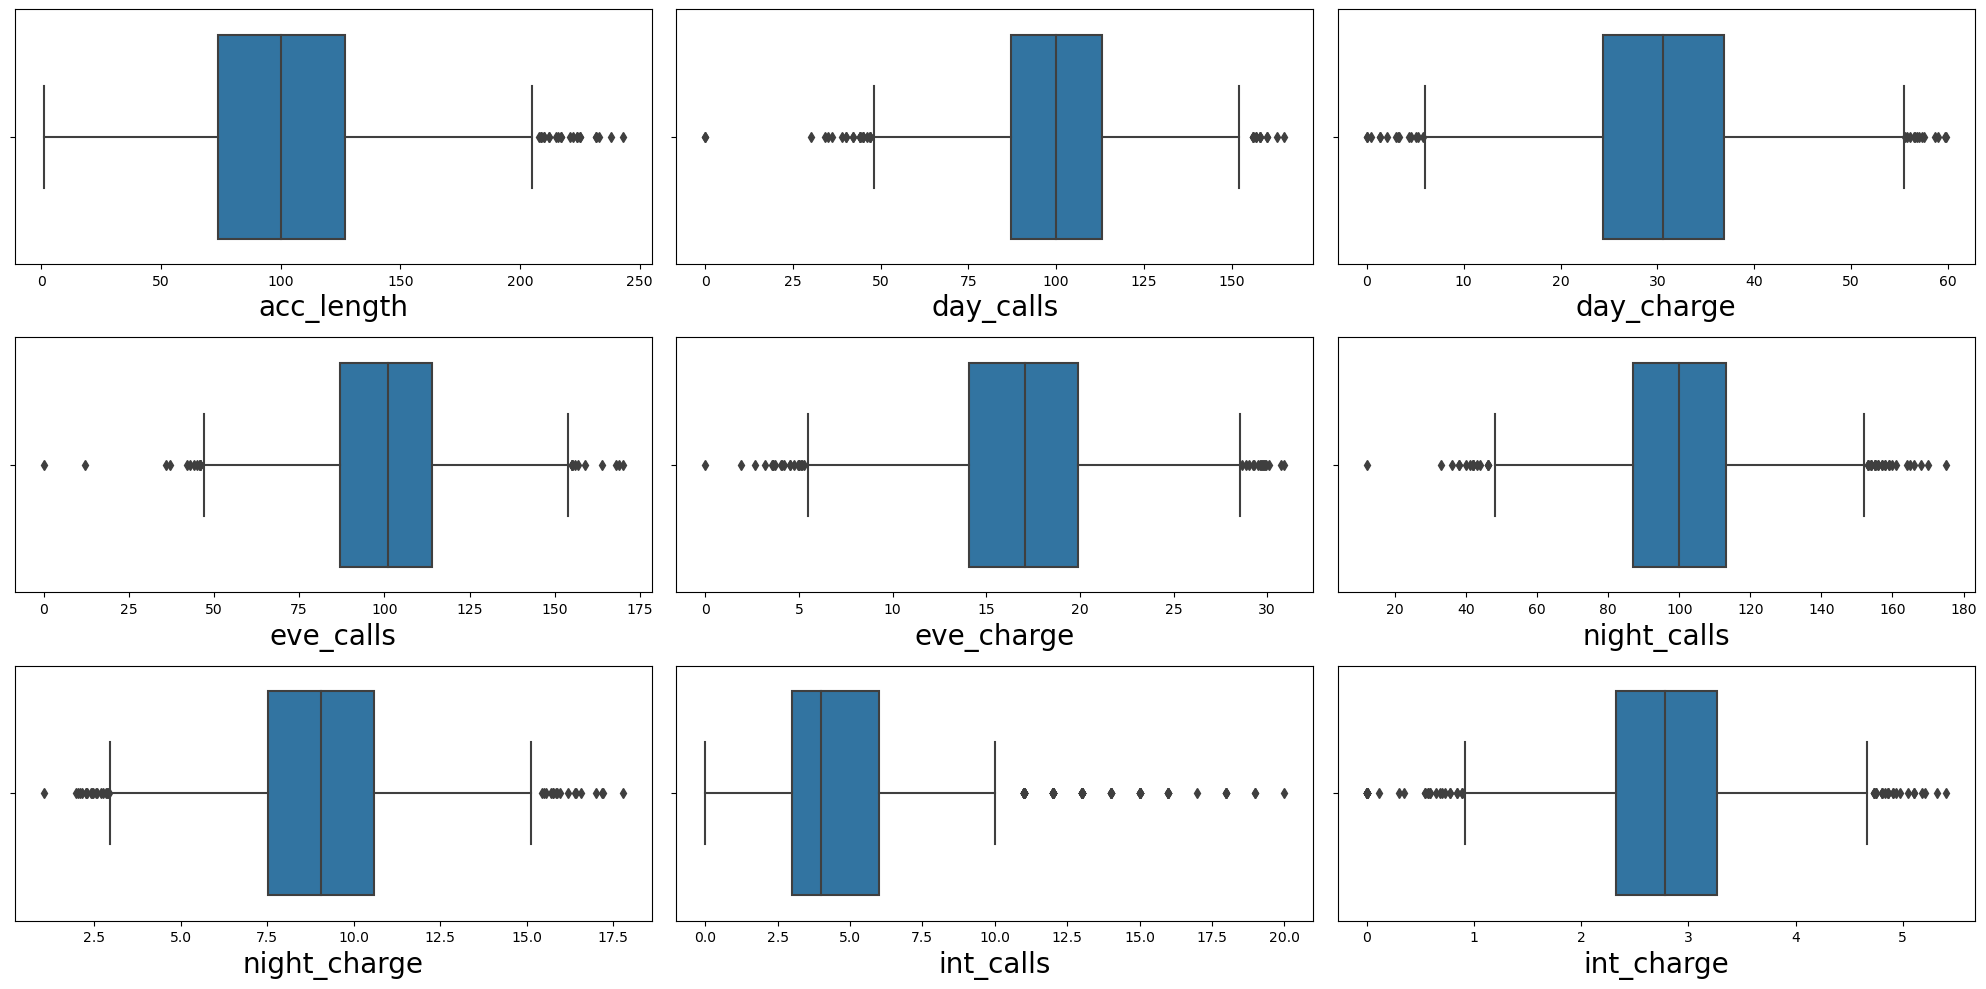

In [728]:
plt.figure(figsize=(20,10)) # defining canvas size
n = 1 
Numerical=['acc_length',
 'day_calls',
 'day_charge',
 'eve_calls',
 'eve_charge',
 'night_calls',
 'night_charge',
 'int_calls',
 'int_charge']
for i in Numerical: 
    if n<=10:    # set the limit
        plt.subplot(3,3,n) 
        sns.boxplot(x=df[i]) # Plotting box plots 
        plt.xlabel(i,fontsize=20)  # assigning name to x-axis and font size is 20
    n+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [729]:
df.head()

,state,acc_length,area_code,int_plan,vmail_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,int_calls,int_charge,cust_serv_calls,churn
0,16,128,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,1,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,1,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


##### CHECKING THE DISTRIBUTION BEFORE HANDLING OUTLIERS

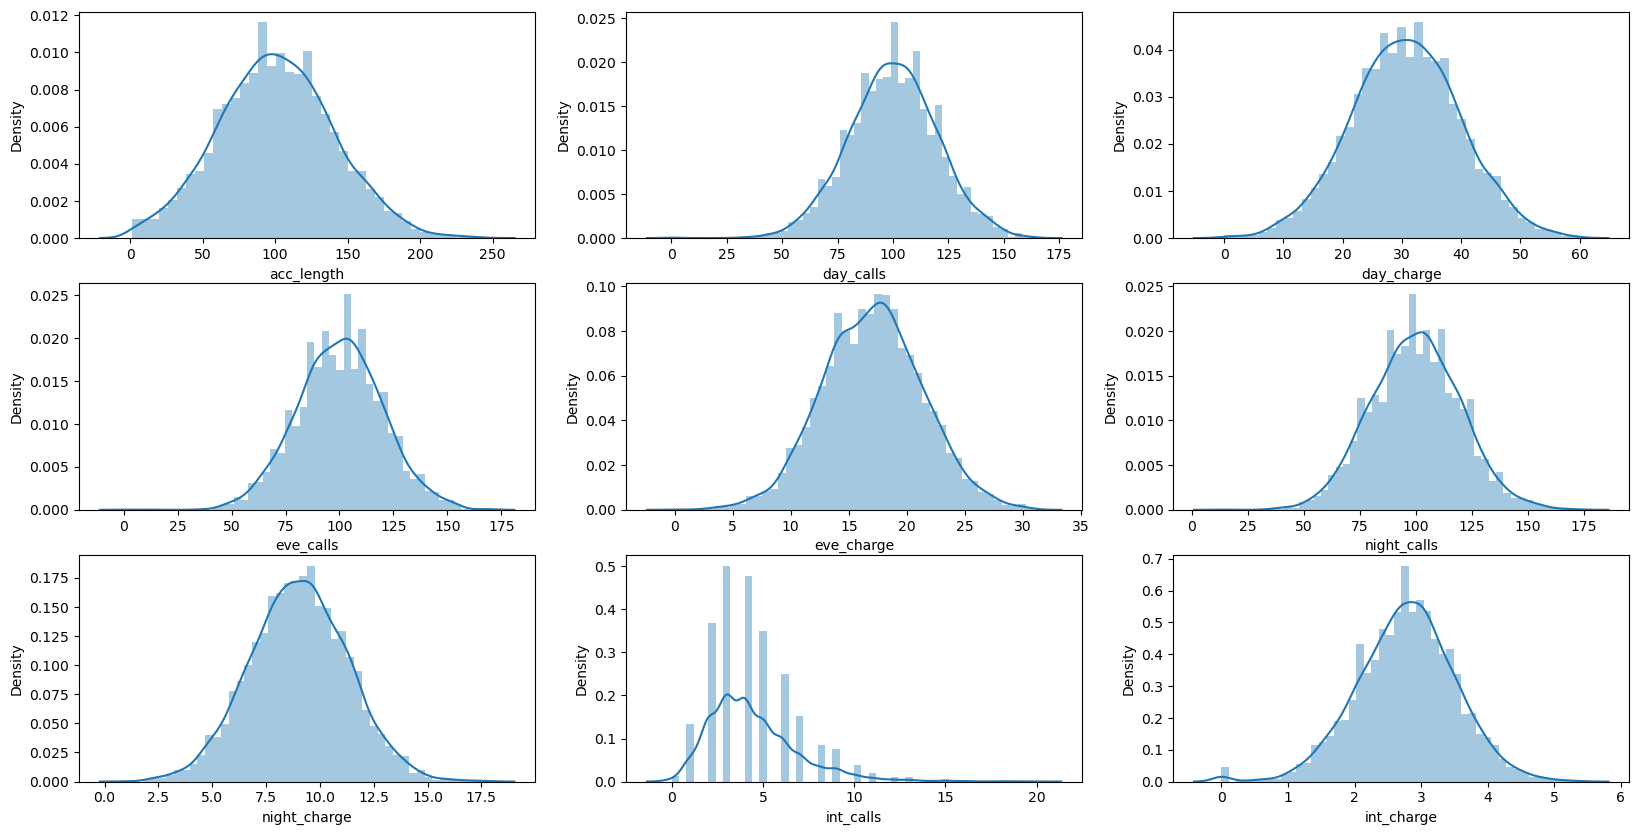

In [730]:
plt.figure(figsize=(20,10)) # defining canvas size
n = 1 # counter

for i in Numerical: 
    if n<=10:    
        plt.subplot(3,3,n)
        sns.distplot(x=df[i]) # Plotting box plots 
        plt.xlabel(i)  # assigning name to x-axis and font size is 20
    n+=1 # counter increment

#### Checking the percentage of outliers 
- If the total outliers percentage in a column is greater than 5% then it is considered as the part of data and no need to handle the outliers for that particular column.

In [731]:
for i in Numerical:
    iqr=stats.iqr(df[i])
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df[i])) * 100
    print(i)
    print(outlier_percentage)

acc_length
0.4981589776911414
day_calls
0.7364089235434265
day_charge
0.5847953216374269
eve_calls
0.5414771496642842
eve_charge
0.7797270955165692
night_calls
0.9096816114359974
night_charge
0.7797270955165692
int_calls
2.317522200563136
int_charge
1.4078405891271388


- Here we can see that the percentage of outliers in each numerical column is not greater than 5 % so can be dropped or handled using imputation methods.
- Here since the total number of data is only 4617 instead of dropping we can impute the datapoints.

In [732]:
for i in Numerical:
    print(i)
    print(df[i].mean())
    print(df[i].median())

acc_length
100.64522417153997
100.0
day_calls
100.0543643058263
100.0
day_charge
30.676575698505562
30.6
eve_calls
100.17977041368854
101.0
eve_charge
17.03670348711283
17.07
night_calls
99.94411955815464
100.0
night_charge
9.028184968594358
9.04
int_calls
4.4338314923110245
4.0
int_charge
2.7759259259259106
2.78


### Mean Imputation:
- Here all the numerical variables are almost uniformly distributed so we can replace with mean.
- And there is not much difference between the mean and median values.
- Replacing outliers with the mean is preferred over the median as it preserves the overall central tendency of the data.

In [733]:
from scipy import stats
for i in Numerical:
    iqr=stats.iqr(df[i])
    Q1=df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    max_limit=Q3+1.5*iqr
    min_limit=Q1-1.5*iqr
    df.loc[df[i] > max_limit ,i]=np.mean(df[i])
    df.loc[df[i] < min_limit ,i]=np.mean(df[i])

### Scaling the data
- we are using StandardScalar,it centers the data around zero and scales it to have a standard deviation of 1

In [734]:
x=df.drop(columns='churn')
y=df.churn

In [735]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [736]:
X=pd.DataFrame(x_scaled,columns=x.columns)

In [737]:
X.head()

,state,acc_length,area_code,int_plan,vmail_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,int_calls,int_charge,cust_serv_calls
0,-0.679001,0.722720,0.001223,-0.327000,1.653916,0.511610,1.609995,-0.062250,-0.065049,-0.461912,0.904546,-0.601569,-0.127557,-0.433885
1,0.605758,0.179710,0.001223,-0.327000,1.653916,1.190068,-0.359895,0.145173,-0.103676,0.166472,1.105438,-0.601569,1.326692,-0.433885
2,0.335283,0.955439,0.001223,-0.327000,-0.604626,0.720367,1.196990,0.508163,-1.629421,0.218837,-0.780209,0.370344,0.730450,-1.199068
3,0.605758,-0.415015,-1.410091,3.058107,-0.604626,-1.523764,2.262521,-0.632663,-0.013651,-0.566643,-0.077086,1.342257,-1.465467,0.331298
4,0.673377,-0.647733,0.001223,3.058107,-0.604626,0.668177,-0.262519,1.130432,-1.071752,1.109048,-0.282544,-0.601569,-0.083930,1.096480


In [738]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [739]:
y_train.value_counts()

0    2756
1     475
Name: churn, dtype: int64

### Balancing the training data using SMOTE technique
- Balancing only the training data is crucial to simulate real-world scenarios and ensure that the model's evaluation on the test data reflects its performance on unseen, imbalanced data.
- An imbalanced dataset occurs when the distribution of classes (target labels) is not roughly equal, meaning one class has significantly more instances than the other(s)


In [740]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote_train, y_smote_train = smote.fit_resample(x_train,y_train)

In [741]:
y_smote_train.value_counts()

0    2756
1    2756
Name: churn, dtype: int64

### Model Training and Evaluation with different classification algorithm
- In the context of a churn prediction problem, the recall score (also known as sensitivity or true positive rate) is often considered more important because of the critical nature of correctly identifying positive cases, i.e., correctly identifying churn.
- Here we need to give more important to both accuracy and recall score.

In [742]:
# importing the metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

In [743]:
print('shape of x_train',x_smote_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_smote_train.shape)
print('shape of y_test',y_test.shape)

shape of x_train (5512, 14)
shape of x_test (1386, 14)
shape of y_train (5512,)
shape of y_test (1386,)


### 1.Logistic Regression 

In [744]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_smote_train,y_smote_train)
y_l_p=logistic.predict(x_test)

In [745]:
# training data-accuracy score
logistic.score(x_smote_train,y_smote_train)

0.7897314949201741

In [746]:
# testing data-accuracy score
log_accuracy=accuracy_score(y_test,y_l_p)
log_recall=recall_score(y_test,y_l_p)
print('accuracy score:',log_accuracy)
print('recall score:',log_recall)
cm=confusion_matrix(y_test,y_l_p)

accuracy score: 0.766955266955267
recall score: 0.7071823204419889


In [747]:
print(classification_report(y_test,y_l_p))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1205
           1       0.32      0.71      0.44       181

    accuracy                           0.77      1386
   macro avg       0.63      0.74      0.65      1386
weighted avg       0.86      0.77      0.80      1386



### 2.Support Vector Classification 

In [748]:
from sklearn.svm import SVC

In [749]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(4):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_smote_train, y_smote_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

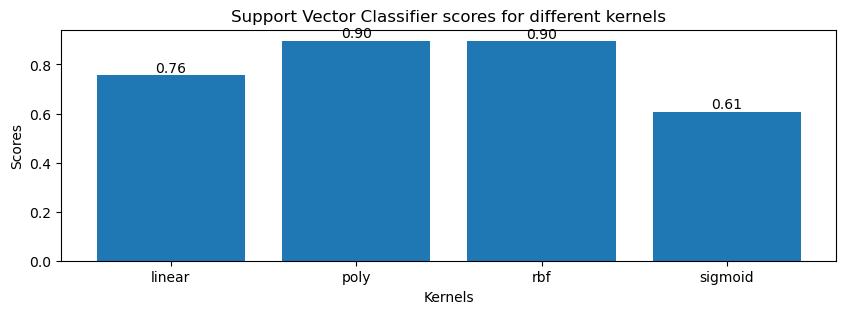

In [750]:
plt.figure(figsize=(10,3))
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], format(svc_scores[i], '.2f'), ha='center', va='bottom')
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

- Here we can see that kernel='rbf' and kernel='poly' performs better than other models

In [751]:
svc=SVC(kernel='rbf',random_state=100)
svc.fit(x_smote_train,y_smote_train)
y_s_p=svc.predict(x_test)

In [752]:
# training data-accuracy score
svc.score(x_smote_train,y_smote_train)

0.9285195936139332

In [753]:
svc_accuracy=accuracy_score(y_test,y_s_p)
svc_recall=recall_score(y_test,y_s_p)
print('accuracy score:',svc_accuracy)
print('recall score:',svc_recall)

accuracy score: 0.8953823953823954
recall score: 0.7237569060773481


In [754]:
print(classification_report(y_test,y_s_p))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1205
           1       0.58      0.72      0.64       181

    accuracy                           0.90      1386
   macro avg       0.77      0.82      0.79      1386
weighted avg       0.91      0.90      0.90      1386



### 3.K-nearest Neighbor Model (KNN)

In [755]:
from sklearn.neighbors import KNeighborsClassifier
recall = []
accuracy=[]
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_smote_train,y_smote_train)
    y_knn_p = knn.predict(x_test)
    recall.append(recall_score(y_test,y_knn_p))
    accuracy.append(accuracy_score(y_knn_p,y_test))
print("recall:",recall)
print('accuracy:',accuracy)

recall: [0.5911602209944752, 0.5414364640883977, 0.7292817679558011, 0.6906077348066298, 0.7513812154696132, 0.7292817679558011, 0.7900552486187845, 0.7679558011049724, 0.8121546961325967, 0.7679558011049724, 0.8066298342541437]
accuracy: [0.8326118326118326, 0.8556998556998557, 0.8167388167388168, 0.8376623376623377, 0.7878787878787878, 0.8167388167388168, 0.7821067821067821, 0.8088023088023089, 0.7727272727272727, 0.8001443001443002, 0.7683982683982684]


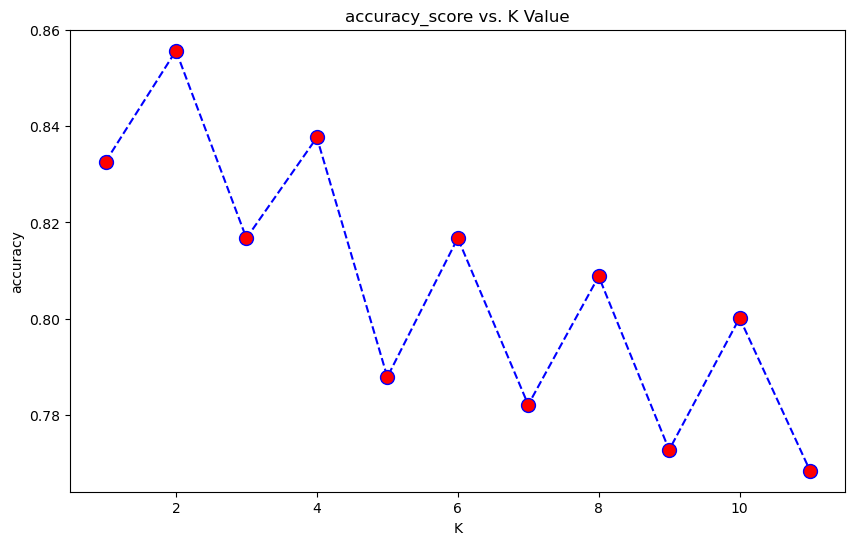

In [756]:
# Plotting the recall score
plt.figure(figsize=(10,6))
plt.plot(range(1,12),accuracy,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy_score vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()

- From the graph at k=2 the accuracy score is high, but the recall score is 0.54 which is not good
- So we choose the next highest accuracy at k=4.

In [757]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_smote_train,y_smote_train)
y_knn_p=knn.predict(x_test)

In [758]:
# training data-accuracy score
knn.score(x_smote_train,y_smote_train)

0.9611756168359942

In [759]:
knn_accuracy=accuracy_score(y_test,y_knn_p)
knn_recall=recall_score(y_test,y_knn_p)
print('accuracy score:',knn_accuracy)
print('recall score:',knn_recall)

accuracy score: 0.8376623376623377
recall score: 0.6906077348066298


In [760]:
print(classification_report(y_test,y_knn_p))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1205
           1       0.43      0.69      0.53       181

    accuracy                           0.84      1386
   macro avg       0.69      0.78      0.71      1386
weighted avg       0.88      0.84      0.85      1386



### 4. Decision Tree

In [761]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_smote_train,y_smote_train)

DecisionTreeClassifier()

In [762]:
# training data-accuracy score
d.score(x_smote_train,y_smote_train)

1.0

In [763]:
y_d_p=d.predict(x_test)
tree_recall=recall_score(y_test,y_d_p)
tree_accuracy=accuracy_score(y_test,y_d_p)
print('accuracy score:',tree_accuracy)
print('recall score:',tree_recall)

accuracy score: 0.8520923520923521
recall score: 0.6906077348066298


In [764]:
print(classification_report(y_test,y_d_p))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1205
           1       0.46      0.69      0.55       181

    accuracy                           0.85      1386
   macro avg       0.70      0.78      0.73      1386
weighted avg       0.89      0.85      0.86      1386



### Hyperparameter tuning of Decision tree

In [765]:
params={"criterion":("gini", "entropy"), 
    "splitter":("best", "random"),
    'max_depth':list(range(10,20)),
    'min_samples_split':(2,3,4,5),
    'min_samples_leaf':list(range(1,10))}
g=GridSearchCV(d,param_grid=params,cv=3,scoring='accuracy',n_jobs=-1)#n_jobs to run in paralell -1 means all
g.fit(x_smote_train,y_smote_train)
print(g.best_params_)
print(g.best_score_)

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
0.9043922245527739


In [786]:
D=DecisionTreeClassifier(criterion='entropy',max_depth=19, min_samples_leaf=4,min_samples_split=5,splitter='best')
D.fit(x_smote_train,y_smote_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4,
                       min_samples_split=5)

In [787]:
# training data-accuracy score
D.score(x_smote_train,y_smote_train)

0.9706095791001451

In [788]:
y_D_p=D.predict(x_test)
Tree_recall=recall_score(y_test,y_D_p)
Tree_accuracy=accuracy_score(y_test,y_D_p)
print('accuracy score:',Tree_accuracy)
print('recall score:',Tree_recall)

accuracy score: 0.8997113997113997
recall score: 0.7182320441988951


In [789]:
print(classification_report(y_test,y_D_p))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1205
           1       0.60      0.72      0.65       181

    accuracy                           0.90      1386
   macro avg       0.78      0.82      0.80      1386
weighted avg       0.91      0.90      0.90      1386



### 5.Random Forest Classifier

In [770]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_smote_train,y_smote_train)

# Prediction on testing data
y_rf_predict = rf.predict(x_test)

In [771]:
rf_accuracy = accuracy_score(y_test,y_rf_predict)
rf_recall = recall_score(y_test,y_rf_predict)
print('accuracy score:',rf_accuracy)
print('recall score:',rf_recall)
print("Classification report of training: \n",classification_report(y_test,y_rf_predict))

accuracy score: 0.937950937950938
recall score: 0.7348066298342542
Classification report of training: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1205
           1       0.78      0.73      0.76       181

    accuracy                           0.94      1386
   macro avg       0.87      0.85      0.86      1386
weighted avg       0.94      0.94      0.94      1386



### Hyperparameter tuning of Random Forest 

In [772]:
from sklearn.model_selection import RandomizedSearchCV  

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] 
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

#  Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#  Object creation
RF = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

#  Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=RF,scoring='accuracy',param_distributions=random_grid,
                           n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

#  Fitting the training data
rf_cv.fit(x_smote_train,y_smote_train)


print(rf_cv.best_params_)
print(rf_cv.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'n_estimators': 1577, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 64}
0.9455732946298985


In [790]:
R = RandomForestClassifier(n_estimators=1577,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=64)

R.fit(x_smote_train,y_smote_train)

#  Prediction on testing data
y_R_p = R.predict(x_test)

In [791]:
R_accuracy = accuracy_score(y_test,y_R_p)
R_recall = recall_score(y_test,y_R_p)
print('accuracy score:',R_accuracy)
print('recall score:',R_recall)
print("Classification report of training: \n",classification_report(y_test,y_R_p))

accuracy score: 0.9386724386724387
recall score: 0.7458563535911602
Classification report of training: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1205
           1       0.78      0.75      0.76       181

    accuracy                           0.94      1386
   macro avg       0.87      0.86      0.86      1386
weighted avg       0.94      0.94      0.94      1386



### 6.XGBClassifier

In [775]:
# import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_smote_train,y_smote_train)

# Step:3 Prediction on training data
y_xgb_predict = xgb.predict(x_test)


In [776]:
xgb_accuracy = accuracy_score(y_test,y_xgb_predict)
xgb_recall = recall_score(y_test,y_xgb_predict)
print('accuracy score:',xgb_accuracy)
print('recall score:',xgb_recall)
print("Classification report of training: \n",classification_report(y_test,y_xgb_predict))

accuracy score: 0.950937950937951
recall score: 0.7624309392265194
Classification report of training: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1205
           1       0.85      0.76      0.80       181

    accuracy                           0.95      1386
   macro avg       0.91      0.87      0.89      1386
weighted avg       0.95      0.95      0.95      1386



### Hyperparameter tuning of XGDBOOST

In [777]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

#  Object creation with parameter
XGB = XGBClassifier(random_state=42)

#  Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='accuracy',param_distributions=param_grid,n_iter=60,
                        cv=4,verbose=2,random_state=42,n_jobs=-1)

#  Fitting the training data
rcv.fit(x_smote_train,y_smote_train)


print(rcv.best_params_)
print(rcv.best_score_)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
{'reg_lambda': 0.4, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0}
0.9577285921625543


In [778]:
XGB2 = XGBClassifier(reg_lambda=0.4,reg_alpha=0.4,n_estimators=115,max_depth=10,learning_rate=0.15,gamma=0)

#  Fitting the training data
XGB2.fit(x_smote_train,y_smote_train)

#  Prediction on testing data
y_XGB_prediction = XGB2.predict(x_test)

In [779]:
XGB_accuracy = accuracy_score(y_test,y_XGB_prediction)
XGB_recall = recall_score(y_test,y_XGB_prediction)
print('accuracy score:',XGB_accuracy)
print('recall score:',XGB_recall)
print("Classification report of training: \n",classification_report(y_test,y_XGB_prediction))

accuracy score: 0.9473304473304474
recall score: 0.7624309392265194
Classification report of training: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1205
           1       0.82      0.76      0.79       181

    accuracy                           0.95      1386
   macro avg       0.89      0.87      0.88      1386
weighted avg       0.95      0.95      0.95      1386



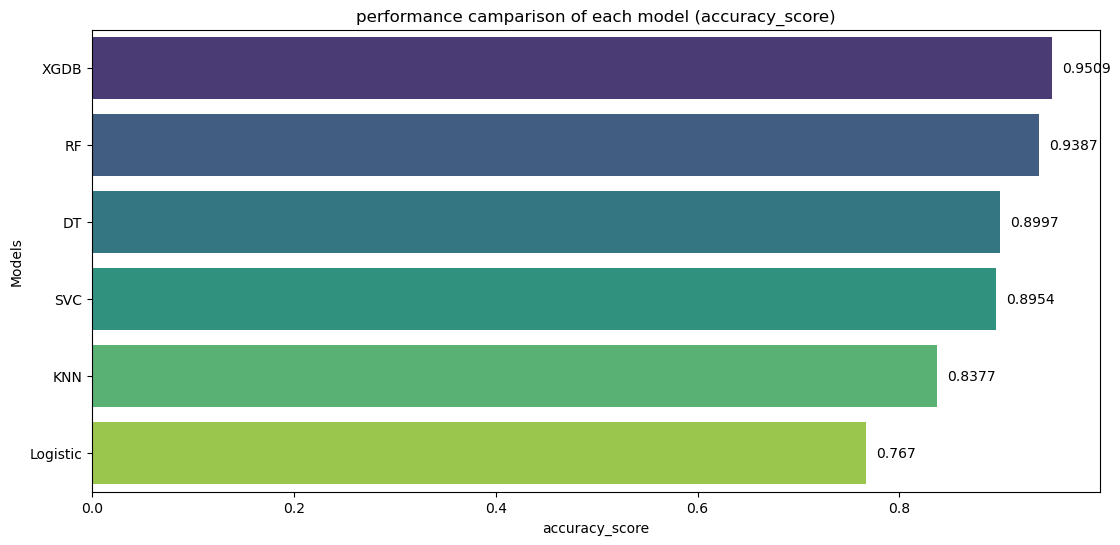

In [792]:
data = pd.DataFrame({
    'Models': ['Logistic', 'SVC', 'KNN', 'DT', 'RF','XGDB'],
    'accuracy_score': [log_accuracy,svc_accuracy,knn_accuracy,Tree_accuracy,R_accuracy,xgb_accuracy]
})

# Sort the DataFrame by the values in descending order
data_sorted = data.sort_values('accuracy_score', ascending=False)
plt.figure(figsize=(13, 6))
ax=sns.barplot(x='accuracy_score', y='Models', data=data_sorted, palette='viridis')
plt.xlabel('accuracy_score')
plt.ylabel('Models')
plt.title('performance camparison of each model (accuracy_score)')
# Add value annotations to the bars
for i, value in enumerate(data_sorted['accuracy_score']):
    ax.text(value + 0.01, i, str(round(value,4)), va='center')
plt.show()

### Best Model for production (XGDBOOST)
- The churn dataset is preprocessed and trained using 6 different models and their results are compared.
- Among the tested models XGBoost, Random Forest,Decision Tree and Support Vector Machine exhibit notable predictive accuracy scores.
- XGBoost outperforms the other models with the highest accuracy score of 95%, positioning it as the preferred choice for predictions.
- Given that the problem centers around precise churn prediction, the recall score (sensitivity) is crucial. XGBoost excels in this aspect too.
- For class 1 (indicating churn - "yes"), XGBoost achieves the highest recall score of 0.76 compared to the other models.
- For class 0 (indicating non-churn - "no"), XGBoost maintains a high recall score of 0.98.
- The slightly lower recall score for class 1 could be attributed to data imbalance; the minority class has fewer instances.
- To address this imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) is applied.
- The SMOTE generates extra instances of class 1 which could impact the recall scores of the model, potentially affecting recall scores.

### 2.Creating Churn risk score that can be indicative to drive retention campaigns
- To calculate the churn risk scores, we will utilize the prediction probability approach of the classifier that achieved the highest accuracy score and in our case it is XGBOOST.
- We will extract the prediction probability values from the XGBoost classifier and append them to the dataset as a new column named "churn_risk_score." 
- This addition will enable us to signify the likelihood of churn for each customer and facilitate the implementation of targeted retention campaigns.

In [794]:
#fitting the model
xgb.fit(x_smote_train,y_smote_train)
# predicting
y_xgb_predict = xgb.predict(x_test)
# prediction probability
y_prob=xgb.predict_proba(x_test)

In [795]:
y_prob

array([[9.9974644e-01, 2.5354503e-04],
       [9.9897498e-01, 1.0250336e-03],
       [9.8432922e-01, 1.5670775e-02],
       ...,
       [9.9002850e-01, 9.9715069e-03],
       [9.8496115e-01, 1.5038878e-02],
       [9.9555498e-01, 4.4450359e-03]], dtype=float32)

- y_prob will display the probability of class 0 and class 1 for each sample.

In [796]:
P=pd.DataFrame(y_prob,columns=['prob_of_0','prob_of_1'])

In [797]:
P['prob_of_1'] # probability of getting class 1

0       0.000254
1       0.001025
2       0.015671
3       0.021681
4       0.000789
          ...   
1381    0.034418
1382    0.000544
1383    0.009972
1384    0.015039
1385    0.004445
Name: prob_of_1, Length: 1386, dtype: float32

In [798]:
x_test=x_test.reset_index(drop=True)#reseting the index

In [809]:
# adding the churn risk score to the testing data
x_test['churn_risk_score'] =P['prob_of_1']
# displaying only certain important columns for easy understanding
x_test[['state','acc_length','area_code','cust_serv_calls','churn_risk_score']].head()

,state,acc_length,area_code,cust_serv_calls,churn_risk_score
0,-0.340907,-1.785468,0.001223,-0.433885,0.000254
1,-1.422809,-1.475176,0.001223,-1.199068,0.001025
2,1.552423,0.334856,1.412536,-0.433885,0.015671
3,-0.611382,1.033011,-1.410091,1.096480,0.021681
4,-0.408526,-0.751163,0.001223,-0.433885,0.000789


In [810]:
# create a frequency table to learn about the churn risks.
fre = pd.DataFrame(x_test['churn_risk_score'].value_counts(bins=10).sort_index())
fre.reset_index(inplace=True)
fre

,index,churn_risk_score
0,"(-0.001943, 0.1]",1135
1,"(0.1, 0.2]",47
2,"(0.2, 0.3]",18
3,"(0.3, 0.4]",14
4,"(0.4, 0.5]",9
5,"(0.5, 0.6]",7
6,"(0.6, 0.7]",15
7,"(0.7, 0.8]",13
8,"(0.8, 0.9]",12
9,"(0.9, 1.0]",116


### 3.Introducing new predicting variable "CHURN-FLAG"

In [815]:
# Create a new column 'CHURN-FLAG' with default values 'YES(1)'
x_test['CHURN-FLAG'] = 'YES(1)'
# Update 'CHURN-FLAG' to 'NO(0)' for cases where churn risk score < 0.6
x_test.loc[x_test['churn_risk_score'] < 0.6, 'CHURN-FLAG'] = 'NO(0)'

In [821]:
# displaying only certain important columns for easy understanding
x_test[['state','acc_length','area_code','cust_serv_calls','churn_risk_score','CHURN-FLAG']].head(8)

,state,acc_length,area_code,cust_serv_calls,churn_risk_score,CHURN-FLAG
0,-0.340907,-1.785468,0.001223,-0.433885,0.000254,NO(0)
1,-1.422809,-1.475176,0.001223,-1.199068,0.001025,NO(0)
2,1.552423,0.334856,1.412536,-0.433885,0.015671,NO(0)
3,-0.611382,1.033011,-1.410091,1.096480,0.021681,NO(0)
4,-0.408526,-0.751163,0.001223,-0.433885,0.000789,NO(0)
5,-0.679001,0.722720,1.412536,0.331298,0.010471,NO(0)
6,1.417185,-1.164885,-1.410091,-1.199068,0.977870,YES(1)
7,-0.881858,-0.596018,1.412536,-1.199068,0.002720,NO(0)


In [820]:
# Churn customers
x_test['CHURN-FLAG'][x_test['CHURN-FLAG']=='YES(1)']

6       YES(1)
21      YES(1)
47      YES(1)
51      YES(1)
63      YES(1)
         ...  
1328    YES(1)
1329    YES(1)
1333    YES(1)
1349    YES(1)
1351    YES(1)
Name: CHURN-FLAG, Length: 156, dtype: object

#### Conclusion:
- From the model we found that XGDBOOST is performing well so we use XGDBOOST model as the base model for production.
- Two additional columns 'churn_risk_score' and 'CHURN-FLAG' were added to the dataset.
- The churn_risk_score signifies the level of risk associated with customer churn. 
- When this score exceeds 0.6, it indicates a higher likelihood of customers churning. 
- Therefore, our focus should be on customers with elevated churn scores. 
- From the provided data, it's evident that among the customers in the testing sample, 156 individuals possess a churn score exceeding 0.6. 
- The 'CHURN-FLAG' variable has valueS NO(0) AND YES(1) , here NO(0) are the customers with 'churn_risk_score' < 0.6 and YES(1) are the customers with 'churn_risk_score' > 0.6.
- These customers with 'churn_risk_score' > 0.6 or 'CHURN-FLAG'=YES(1) becomes our target audience for implementing a retention campaign.
- Email campaigns with lucrative offers can be targeted to Churn YES customers. 

In [827]:
# displaying the entire columns including 'churn_risk_score' and 'CHURN-FLAG'.
x_test.head() 

,state,acc_length,area_code,int_plan,vmail_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,int_calls,int_charge,cust_serv_calls,churn_risk_score,CHURN-FLAG
0,-0.340907,-1.785468,0.001223,-0.327,-0.604626,0.250665,-0.273712,-0.373385,-2.488860,-0.095355,0.269909,-1.087526,0.934045,-0.433885,0.000254,NO(0)
1,-1.422809,-1.475176,0.001223,-0.327,-0.604626,0.720367,0.082211,1.597133,-1.436289,-1.613950,-0.524528,2.314170,-0.912852,-1.199068,0.001025,NO(0)
2,1.552423,0.334856,1.412536,-0.327,-0.604626,-0.636550,-2.054448,0.611874,0.070144,0.951952,-1.697921,-0.601569,-1.465467,-0.433885,0.015671,NO(0)
3,-0.611382,1.033011,-1.410091,-0.327,1.653916,-0.427793,1.044771,-1.514211,-0.813437,-0.042990,0.233383,-1.087526,-0.563832,1.096480,0.021681,NO(0)
4,-0.408526,-0.751163,0.001223,-0.327,1.653916,-0.532172,-1.238510,-1.151221,0.345357,0.114106,0.808665,-0.115613,1.094012,-0.433885,0.000789,NO(0)
